In [167]:
import pandas as pd
import numpy as np


In [168]:
df = pd.read_csv('C:/Users/ishik/Downloads/archive (2)/vehicles.csv')

In [169]:
# Getting info on type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [170]:
# Calculating total no. of null values in each column as we saw there multiple nan values in columns
df.isnull().sum()   

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [171]:
#Dropping the columns which is not usable or have high percentage of null values in order to reduce the size of data 
# which will decrease the processing time as well
df.drop(columns=['id','url','region_url','VIN','image_url','description','county','posting_date','size','lat','long'],inplace=True)

In [172]:
# Count duplicate rows
duplicate_count = df[df.duplicated()].shape[0]
# Print the count of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 56491


In [173]:
# Drop duplicate rows
df = df.drop_duplicates()
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [174]:
df = df[(df['year'] > 1989) & (df['price'].between(2000, 70000))]


# Show the filtered data
print(df)

         region  price    year manufacturer                     model  \
27       auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
28       auburn  22590  2010.0    chevrolet            silverado 1500   
29       auburn  39590  2020.0    chevrolet       silverado 1500 crew   
30       auburn  30990  2017.0       toyota      tundra double cab sr   
31       auburn  15000  2013.0         ford                 f-150 xlt   
...         ...    ...     ...          ...                       ...   
426875  wyoming  23590  2019.0       nissan         maxima s sedan 4d   
426876  wyoming  30590  2020.0        volvo  s60 t5 momentum sedan 4d   
426877  wyoming  34990  2020.0     cadillac          xt4 sport suv 4d   
426878  wyoming  28990  2018.0        lexus           es 350 sedan 4d   
426879  wyoming  30590  2019.0          bmw  4 series 430i gran coupe   

        condition    cylinders    fuel  odometer title_status transmission  \
27           good  8 cylinders     gas   5792

In [175]:
df.isnull().sum()

region               0
price                0
year                 0
manufacturer     10087
model             2736
condition       110550
cylinders       127705
fuel              1855
odometer          1529
title_status      4928
transmission      1453
drive            94315
type             63778
paint_color      85789
state                0
dtype: int64

In [176]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [177]:
df11=df.copy()

In [178]:
def cleaning_data(row):
    manufacturer_models = {
        
        'acura': {'tsx', 'mkx', 'mdx', 'tlx', 'ilx', 'rsx', 'rdx', 'tl', 'rlx'},
        'alfa-romeo': {'stelvio', 'giulia', 'spider'},
        'aston-martin': {'martin v8', 'martin db', 'romeo spider'},
        'audi': {'q5', 'a6', 'q7', 'a3', 'a4', 's7', 'q8', 'tt', 'q3', 's9', 'a8', 's4', 's5'},
        'bmw': {'1 series', '5 series', 'x3', 'x6', 'x5', '3 series', '640i', '4 series', '2 series', '750i', 'x1',
                'm8', '328i', '330i', '430i', '320i', 'i3', '6 series', 'm4', 'm5', '428i', 'i8', '428', 'bmw_other'},
        'buick': {'encore', '1 series', 'enclave', '5 series', 'lacrosse', 'lesabre', 'x3', 'regal', 'x6', 'x5',
                  'verano', '3 series', '640i', 'lucerne', 'rainier', '4 series', '2 series', '750i', 'x1', 'envision',
                  'm8', 'rendezvous', '328i', '330i', 'century', '430i', '320i', 'terraza', 'park avenue', 'roadmaster',
                  'i3', 'special', 'skylark', '6 series', 'm4', 'm5', 'touring', '428i', 'reatta', 'le sabre', 'i8',
                  'invita', 'rivera', 'cascada', 'estate', 'cxl', 'gs 400', '2 door street rod', 'gs 455', 'model 57',
                  '428', 'sedanette', 'buick_other'},
        'volvo':{'xc90','xc70','xc 70','xc 90','xc60','wc 60','xc40','wia','wg','vnm','vnl','v90','v70','v60','v50','v40','s90','s80','s70','s60','s40','fe','d13','d12','d11','cx','c70','c30','wagon','turbo','gl','sedan'},
        'volkswagen':{'westfalia','van','touareg','tiquan','tiguan','jetta','t4','routan','rabbit','r32','phaeton','passat','beetle','gti','golf', 'eurovan','eos','cc','cabrio','atlas','arteon'},
        'toyota':{'yaris','venza','tundra','townace','tacoma','t100','supra','sr5','solara','sienna','sequoia','scion','rav4','prius','mr2','matrix','liteace','land cruiser','hilux','highlander','hiace','four runner','fj','corolla','c-hr','celica','camry','avalon','4runner'},
        'tesla':{'model x','model s','model 3'},
        'saturn':{'vue','sky','relay','outlook','l-series','ion','aura','astra'},
        'rover':{'velar','v8','v6','sport','evoque','lr','hse','discovery','defender'},
        'ram':{'wagon','van','truck','tradesman','sport','srt','slt','quad','promaster','laramie','classic','big horn','mega','laramoi','cummin','cummins','dakota','chassis','crew','st','silverado'},
        'nissan':{'xterra','versa','ud','titan','skyline','sentra','rogue','rouge','quest','pathfinder','nv','murano','maxima','titan','leaf','kicks','juke','hardbody','frontier','cube','armada','altima','roadster','nismo','350z'},
        'mini':{'campervan','roadster','paceman','hardtop','coupe','countryman','cooper','clubman'},
        'mercury':{'villager','sable','mountaineer','montery','montego','milan','mariner','marquis','cougar','capri'},
        'mazda':{'tribute','speed','rx7','rx8','protege','mx-5','mpv','miata','mazdaspeed3','mazda6','mazda5','mazda3','cx-9','cx-7','cx-5','cx-3','b-series','b4000','b2500','b2200','6i','3i','3 s'},
        'lincoln':{'zephyr','town','navigator','nautilus','mkz','mkx','mkt','mks','mkc','mark','ls','limo','corsiar','continental','aviator'},
        'lexus':{'ux','sc430','rx400h','rx350','rx330','rx300','rx','rc','nx','lx','ls','is','hs','gx','gs','es','ct'},
        'land rover':{'rangerover','lr3','lr2','hse','freelander','dicovery'},
        'kia':{'telluride','stinger','sportage','spectra','soul','sorento','sedona','rondo','rio','optima','niro','k900','k5','forte','cadenza','borrego','amanti'},
        'jeep':{'wranger','unlimited','tj','sahara','sport','rubicorn','renegade','patriot','compass','gladiator','liberty','commander','cherokee'},
        'infiniti':{'qx80','qx70','qx60','qx50','qx4','qx30','q70','q60','q50','q40','m56','m37','m35','jx35','i35','i30','g37','g35','g25','fx50','fx45','fx35','ex37','ex35'},
        'honda':{'vtx','s2000','ridgeline','prelude','piolot','passport','odyssey','insight','integra','hr-v','goldwing','fit','element','del','cr-z','crz','crx','cr-v','crv','crosstour','clarity','civic','accord'},
        'cadillac': {'xt4', 'srx', 'sts', 'escalade', 'xt5', 'cts', 'deville', 'dts', 'eldorado', 'xts', 'xlr',
                     'coupe deville', 'ats', 'ct6', 'seville', 'cts4', 'xt6', 'brougham', 'fleetwood', 'lasalle',
                     'concours', 'limousine', 'de ville', 'sixty-two series', 'catera', 'allante', 'hearse', 'dts ',
                     'xts4', 'convertible project', 'saville', 'fleetwood limousine', 'dtx', 'commercial',
                     'professional', 'ct5', 'srx4'},
        'chevrolet': {'silverado', 'colorado', 'corvette', 'camaro', 'express cargo van', 'blazer', 'malibu',
                      'monte carlo', 'tahoe', 'bel air', 'captiva sport', 'cobalt', 'cavalier', 'traverse', 'impala',
                      'trax', 'hhr', 's10 pickup', 'trailblazer', 'sonic', 'express', 'suburban', '4500 lcf gas',
                      'cc4500', 'captiva', 'cruze', 'k5 blazer', 'belair', 'equinox', 'ssr', 'avalance',
                      'astro cargo van', 'spark', 'bolt ev', 'volt', 'g30', 'bolt', 'corvair', 'pickup truck',
                      'chevelle'},
        'chrysler': {'town & country', 'pt', '200', 'pacifica touring', 'aspen', 'voyager', '300', 'pacifica',
                     '5th avenue', 'windsor', 'sebring', 'gem 2', 'crossfire', 'lebaron', 'royal', 'prowler',
                     'newport', 'touring', 'pt cruiser', 'eagle', 'cordoba', 'cirrus', 'concorde', 'new yorker',
                     'desoto'},
        'datsun': {'240z', '280zx', 'roadster', '280z', '620', '1600', '280zx turbo', '520', '120y', '510',
                   '29', '260z'},
        'dodge': {'charger', 'grand caravan', 'durango', 'challenger', 'viper', 'dakota', 'dart', 'journey',
                  'caliber mainstreet', 'caravan', 'journey sxt', 'caliber', 'avenger', 'nitro', 'magnum',
                  'powerwagon', 'intrepid', 'intern', 'phaeton', 'journey crossroad', 'd50', 'neon', 'dually',
                  'sprinter', 'w100', 'swb', 'travco', 'desoto', 'laramie', 'sweptline', 'stratus', 'ramcharger',
                  'decota', 'daytona', 'diplomat', 'tradesman', 'lone star', 'ram1500', 'ram5500', 'coronet',
                  'w300', 'd300', 'dart gt', 'tow truck', 'short flatbed', 'duelly', 'braun'},
        'ferrari': {'360 modena', '488 spider', '488 gtb', 'california', 'f430', 'california t', 'ff', 'f355 spider',
                'f8 tributo', '575m maranello', '575', '458 speciale', 'modena 360', '456 mgt', 'f12berlinetta',
                '458 italia', 'f355', 'f430 spider', 'f12 berlinetta', 'california convertible', '360 spider',
                '458 spider', 'mondial', '348 tb', 'mondial cabriolet', 'f50', '550 maranello', '360',
                '360 modena spyder'},
        'fiat': {'500', '124 spider', 'spider', 'x1/9', 'campagnola', 'bertone', 'pop convertible', '850 spider', 'spider 124'},
        'ford': {'f150', 'f250', 'mustang', 'expedition', 'ranger', 'thunderbird', 'focus', 'windstar', 'sport trac',
             'c-max', 'f750', 'f100', 'escape', 'taurus', 'edge', 'f250 xl', 'crown', 'f-250', 'explorer', 'bronco',
             'econoline', 'freestar', 'e350', 'transit', 'f550', 'fusion', 'freestyle', 'super duty', 'fusion se',
             'coupe', 'pick up', 'fiesta', 'crown victoria', 'flex', 'custom', 'slantback', 'excursion', 'country',
             'e-250', 'f700', 'f-350', 'sedan', 'f-550', 'f-450', 'f-750', 'slantbacl', 'club wagon',
             'transit passenger', 'crown vic', 'custom sedan', 'tunderbird', 'boyertown'},
        'harley-davidson':{'davidson', 'dav supercrew', 'softail rwd gas', 'street glide', 'flhx street glide',
                        'hd sportster 48', 'xl1200x', 'flstfb', 'evo fat boy', 'dyna', 'electra glide ul',
                        'heritage softail'},
        'gmc': {'acadia', 'yukon', 'canyon', 'terrain', 'denali', 'savana', 'tc5500', 'sonoma', 'envoy', 'brigadier','jimmy slt', 'c15', 'g2500', 'g3500', 'jimmy', 'step side pickup','cayon', 'coca-cola', 'g savana','delivery truck', 'waldoch conversion van', 'zr2 sonoma'},
        'Subaru': {'forester', 'impreza', 'legacy', 'outback', 'tribeca', 'wawagon', 'WRX', 'xv'},
        'Porsche': {'718', '911', '968', '986', '997', 'Cayman', 'Carrera', 'convertible', 'turbo', 's4', 's2', '944', 'boxter', 'cayenne', 'macan', 'panamera'},
        'Pontiac': {'Aztec', 'Bonneville', 'firebird', 'firehawk', 'formula', 'gt', 'g3', 'g5', 'g6', 'g8', 'gr', 'grand', 'got', 'Montana', 'solstice', 'sunbird', 'sunfire', 'torrent', 'tran', 'trans', 'vibe'},
        'Mitsubishi': {'3000', 'box', 'delica', 'diamante', 'eclipse', 'endeavor', 'evo', 'Fe', 'Fh', 'fk', 'fusco', 'fuso', 'galant', 'imiev', 'l300', 'lancer', 'minicab', 'mini-cab', 'mirage', 'Montero', 'outlander', 'pajero', 'raider', 'raiders', 'rvr', 'tk'},
        'Mercedes-Benz': {'6', '300', '500', '240', '320e', '350', '3500', '40', '450', '500', '550', '560', '600', 'a-class', 'amg', 'awd', 'b-class', 'benz', 'c 240', 'c 250', 'c 280', 'c 300', 'c 320', 'c 350', 'c 400', 'c 63', 'c class', 'c230', 'c240', 'c250', 'c280', 'c300', 'c-280', 'c-300', 'c-320', 'c43', 'c55', 'c63', 'c-class', 'cl', 'cla', 'cla-class', 'clk', 'cls', 'e', 'e320', 'e350', 'e500', 'e-class', 'e-series', 'g550', 'g63', 'g-class', 'gl', 'gl 350', 'gl 450', 'gl 550', 'gl350', 'gl450', 'gl550', 'gla', 'glc', 'gl-class', 'gle-class', 'glk', 'glk-class', 'gls', 'gls-class', 'm', 'mclass', 'm-class', 'metris', 'ml', 'ml250', 'ml320', 'ml350', 'ml500', 'ml55', 'r320', 'r', 'r-class', 'r350', 'r 350', 'r 320', 's 350', 's 430', 's 500', 's 550', 's class', 's320', 's350', 's400', 's420', 's500', 's550', 's-550', 's600', 's63', '65', 's-class', 'sl', 'sl320', 'sl500', 'sl550', 'slc', 'sl-class', 'slc-class', 'slc300', 'slk', 'slk250', 'slk280', 'slk320', 'slk350', 'slk-class', 'sprinter'},
        'Jaguar': {'8cl', 'e-pace', 'f pace', 'f type', 'f-type', 'ftype', 'I pace', 'i-pace', 's type', 's-type', 'super', 'vanden', 'vanden plas', 'x type', 'xe', 'xer', 'xf', 'xfr', 'xj', 'xj40', 'xj6', 'xj8', 'xjl', 'xjr', 'xjs', 'xj-series', 'xk', 'xk6', 'xk8', 'xke', 'xkr', 'x-type', 'xtype'},
        'Hyundai': {'accent', 'azera', 'elantra', 'entourage', 'equus', 'genesis', 'ioniq', 'kona', 'santa', 'sonata', 'spectra', 'sport', 'tiburon', 'tuscon', 'veloster', 'veracruz', 'xc350l', 'xg 350', 'xg300', 'xg350','xg350l'}
}
    

    manufacturer = row['manufacturer']
    model = row['model']

    if pd.isna(model):  # Check if model is NaN
        return f"{manufacturer}_other"

    if manufacturer in manufacturer_models:
        models = manufacturer_models[manufacturer]
        for model_name in models:
            if model_name in model:
                return model_name
        return f"{manufacturer}_other"
    else:
        return "other"

# Apply the cleaning_data function to each row in the DataFrame
df11['cleaned_model'] = df11.apply(cleaning_data, axis=1)


In [180]:
df11['cleaned_model'].nunique

<bound method IndexOpsMixin.nunique of 27         gmc_other
28         silverado
29         silverado
30            tundra
31        ford_other
             ...    
426875        maxima
426876         sedan
426877           xt4
426878            es
426879      4 series
Name: cleaned_model, Length: 314668, dtype: object>

In [181]:
df11.drop(columns='model',inplace=True)

In [182]:
df11.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,cleaned_model
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,gmc_other
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,silverado
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,silverado
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,tundra
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,ford_other


In [183]:
df11 = df11.rename(columns={'cleaned_model': 'model'})
df11

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,model
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,gmc_other
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,silverado
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,silverado
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,tundra
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,ford_other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy,maxima
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy,sedan
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy,xt4
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,es


In [184]:
df=df11.copy()

In [185]:
df.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,model
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,gmc_other
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,silverado
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,silverado
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,tundra
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,ford_other


In [186]:
#creating a variable which contains all the rows with null values in manufacturer column
#which we can impute based on the model column
null_manufacturer_rows = df[df['manufacturer'].isnull()]

In [187]:
# Define a mapping dictionary with models as keys and manufacturers as values
model_to_manufacturer = {
    '200sl': 'Mercedes-Benz',
    '228i': 'BMW',
    '230i': 'BMW',
    '240d': 'Mercedes-Benz',
    '240z': 'Datsun',
    '2500hd': 'GMC',
    '280zx': 'Datsun',
    '3-series': 'BMW',
    '300-series': 'Lexus',
    '3000gt': 'Mitsubishi',
    '300zx': 'Nissan',
    '320i': 'BMW',
    '325i': 'BMW',
    '325is': 'BMW',
    '328i': 'BMW',
    '328xi': 'BMW',
    '330ci': 'BMW',
    '330i': 'BMW',
    '330xi': 'BMW',
    '335i': 'BMW',
    '3500hd': 'GMC',
    '350z': 'Nissan',
    '370z': 'Nissan',
    '4-runner': 'Toyota',
    '428i': 'BMW',
    '430i': 'BMW',
    '450gl': 'Mercedes-Benz',
    '450slc': 'Mercedes-Benz',
    '4runner': 'Toyota',
    '5-series': 'BMW',
    '500c': 'Fiat',
    '500sl': 'Mercedes-Benz',
    '500x': 'Fiat',
    '525i': 'BMW',
    '528i': 'BMW',
    '528xi': 'BMW',
    '530i': 'BMW',
    '535i': 'BMW',
    '540i': 'BMW',
    '550i': 'BMW',
    '645ci': 'BMW',
    '650i': 'BMW',
    '7-series': 'BMW',
    '740li': 'BMW',
    '750li': 'BMW',
    'AM': 'Aston Martin',
    'AMC': 'AMC',
    'BMX': 'BMW',
    'Bentley': 'Bentley',
    'Blue': 'Blue Bird',
    'CHASSIS': 'CHASSIS',
    'CHEC': 'CHEC',
    'CHECKER': 'Checker',
    'CHEV.': 'Chevrolet',
    'CHOVROLET': 'Chevrolet',
    'Corolla': 'Toyota',
    'E350': 'Mercedes-Benz',
    'ELANTRA': 'Hyundai',
    'ELEMENT': 'Honda',
    'ES': 'Lexus',
    'Escape': 'Ford',
    'F-150': 'Ford',
    'F-250': 'Ford',
    'F0RD': 'Ford',
    'F150': 'Ford',
    'F450': 'Ford',
    'FORD/MUSTANG': 'Ford',
    'Foed': 'Ford',
    'For': 'Ford',
    'Ford,': 'Ford',
    'Freightliner': 'Freightliner',
    'GEM': 'GEM',
    'Genesis': 'Hyundai',
    'HUMMER': 'Hummer',
    'Hino': 'Hino',
    'IHC': 'International Harvester',
    'INTERNATIONAL': 'International Harvester',
    'Internatioal': 'International Harvester',
    'International': 'International Harvester',
    'Isuzu': 'Isuzu',
    'Lamborghini': 'Lamborghini',
    'MB': 'Mercedes-Benz',
    'MINI/COOPER': 'MINI',
    'Maserati': 'Maserati',
    'Mazda3': 'Mazda',
    'Mercede-Benz': 'Mercedes-Benz',
    'MiniCooper': 'MINI',
    'Mustang': 'Ford',
    'OLDSMOBILE': 'Oldsmobile',
    'Oldsmobile': 'Oldsmobile',
    'PETERBILT': 'Peterbilt',
    'PT': 'Chrysler',
    'Plymouth': 'Plymouth',
    'Pontica': 'Pontiac',
    'Rolls': 'Rolls-Royce',
    'STERLING': 'Sterling',
    'Saab': 'Saab',
    'Scion': 'Toyota',
    'Suabru': 'Subaru',
    'Subaro': 'Subaru',
    'Town': 'Chrysler',
    'Triumph': 'Triumph',
    'WANTED!': 'WANTED!',
    'WPOAA2993XS620614': 'Porsche',
    'Workhorse': 'Workhorse',
    'XLT': 'Ford',
    'Yamaha': 'Yamaha',
    'a-class': 'Mercedes-Benz',
    'a3': 'Audi',
    'a4': 'Audi',
    'a5': 'Audi',
    'a6': 'Audi',
    'a7': 'Audi',
    'a8': 'Audi',
    'acadia': 'GMC',
    'accent': 'Hyundai',
    'accord': 'Honda',
    'acty': 'Honda',
    'aerostar': 'Ford',
    'alanta': 'Chevrolet',
    'all-new': 'Mitsubishi',
    'allroad': 'Audi',
    'altima': 'Nissan',
    'amanti': 'Kia',
    'amc': 'AMC',
    'armada': 'Nissan',
    'arteon': 'Volkswagen',
    'ascent': 'Subaru',
    'astra': 'Saturn',
    'astro': 'Chevrolet',
    'atlas': 'Volkswagen',
    'ats': 'Cadillac',
    'aura': 'Saturn',
    'avalanche': 'Chevrolet',
    'avalon': 'Toyota',
    'avenger': 'Dodge',
    'aveo': 'Chevrolet',
    'azera': 'Hyundai',
    'b3000': 'Mazda',
    'b4000': 'Mazda',
    'baja': 'Subaru',
    'beetle': 'Volkswagen',
    'beetle-classic': 'Volkswagen',
    'bel': 'Chevrolet',
    'belair': 'Chevrolet',
    'benz': 'Mercedes-Benz',
    'blazer': 'Chevrolet',
    'bolt': 'Chevrolet',
    'bonanza': 'Chevrolet',
    'bonneville': 'Pontiac',
    'boxster': 'Porsche',
    'bronco': 'Ford',
    'brz': 'Subaru',
    'c': 'Chrysler',
    'c-10': 'Chevrolet',
    'c-class': 'Mercedes-Benz',
    'c-hr': 'Toyota',
    'c-max': 'Ford',
    'c/k': 'Chevrolet',
    'c10': 'Chevrolet',
    'c230': 'Mercedes-Benz',
    'c280': 'Mercedes-Benz',
    'c300': 'Mercedes-Benz',
    'c4500': 'GMC',
    'c5500': 'GMC',
    'cabellero': 'GMC',
    'cabriolet': 'Volkswagen',
    'caddilac': 'Cadillac',
    'cadenza': 'Kia',
    'camaro': 'Chevrolet',
    'camry': 'Toyota',
    'canyon': 'GMC',
    'capri': 'Ford',
    'caprice': 'Chevrolet',
    'captiva': 'Chevrolet',
    'caravan': 'Dodge',
    'cargo': 'Chevrolet',
    'cavalier': 'Chevrolet',
    'cayenne': 'Porsche',
    'cayman': 'Porsche',
    'cc': 'Volkswagen',
    'cc4500': 'Chevrolet',
    'celica': 'Toyota',
    'centra': 'Nissan',
    'century': 'Buick',
    'challenger': 'Dodge',
    'challengers': 'Dodge',
    'charger': 'Dodge',
    'cherokee': 'Jeep',
    'chevelle': 'Chevrolet',
    'chevorlet': 'Chevrolet',
    'chryler': 'Chrysler',
    'civic': 'Honda',
    'cj5': 'Jeep',
    'cl': 'Acura',
    'cl-class': 'Mercedes-Benz',
    'cla': 'Mercedes-Benz',
    'cla-class': 'Mercedes-Benz',
    'cla45': 'Mercedes-Benz',
    'clarity': 'Honda',
    'clk': 'Mercedes-Benz',
    'clk-class': 'Mercedes-Benz',
    'clk320': 'Mercedes-Benz',
    'clk350': 'Mercedes-Benz',
    'clk550': 'Mercedes-Benz',
    'cls': 'Mercedes-Benz',
    'cls-class': 'Mercedes-Benz',
    'club': 'Mercedes-Benz',
    'cmax': 'Ford',
    'cobalt': 'Chevrolet',
    'colbalt': 'Chevrolet',
    'colorado': 'Chevrolet',
    'commander': 'Jeep',
    'compass': 'Jeep',
    'continental': 'Lincoln',
    'convertible': 'BMW',
    'cooper': 'MINI',
    'corolla': 'Toyota',
    'corolla..le': 'Toyota',
    'corsair': 'Lincoln',
    'corvair': 'Chevrolet',
    'corvette': 'Chevrolet',
    'cougar': 'Mercury',
    'countryman': 'MINI',
    'coupe': 'BMW',
    'cr-v': 'Honda',
    'cr-z': 'Honda',
    'crossfire': 'Chrysler',
    'crosstrek': 'Subaru',
    'crown': 'Toyota',
    'cruse': 'Chevrolet',
    'cruze': 'Chevrolet',
    'crv': 'Honda',
    'ct': 'Lexus',
    'ct4': 'Cadillac',
    'ct5': 'Cadillac',
    'ct6': 'Cadillac',
    'cts': 'Cadillac',
    'cts-v': 'Cadillac',
    'ctsv': 'Cadillac',
    'cube': 'Nissan',
    'cummin': 'Cummins',
    'cummins': 'Cummins',
    'cv': 'Chevrolet',
    'cx-3': 'Mazda',
    'cx-5': 'Mazda',
    'cx-7': 'Mazda',
    'cx-9': 'Mazda',
    'cx9': 'Mazda',
    'dakota': 'Dodge',
    'dart': 'Dodge',
    'deisel': 'Diesel',
    'deluxe': 'Ford',
    'deville': 'Cadillac',
    'diesel': 'Diesel',
    'discovery': 'Land Rover',
    'dts': 'Cadillac',
    'durango': 'Dodge',
    'e': 'Mercedes-Benz',
    'e-150': 'Ford',
    'e-250': 'Ford',
    'e-350': 'Ford',
    'e-450': 'Ford',
    'e-class': 'Mercedes-Benz',
    'e-golf': 'Volkswagen',
    'e-pace': 'Jaguar',
    'e-series': 'Ford',
    'e150': 'Ford',
    'e250': 'Ford',
    'e350': 'Ford',
    'e450': 'Ford',
    'e550': 'Ford',
    'eagle': 'Eagle',
    'echo': 'Toyota',
    'eclipse': 'Mitsubishi',
    'eclipses': 'Mitsubishi',
    'econoline': 'Ford',
    'ecosport': 'Ford',
    'edge': 'Ford',
    'el': 'Chevrolet',
    'elantra': 'Hyundai',
    'eldorado': 'Cadillac',
    'element': 'Honda',
    'enclave': 'Buick',
    'encore': 'Buick',
    'endeavor': 'Mitsubishi',
    'entourage': 'Hyundai',
    'envoy': 'GMC',
    'envoy/sle': 'GMC',
    'eos': 'Volkswagen',
    'equinox': 'Chevrolet',
    'equus': 'Hyundai',
    'es300': 'Lexus',
    'es330': 'Lexus',
    'es350': 'Lexus',
    'escalade': 'Cadillac',
    'escape-se,': 'Ford',
    'eurovan': 'Volkswagen',
    'evoque': 'Land Rover',
    'ex35': 'Infiniti',
    'excursion': 'Ford',
    'expedition': 'Ford',
    'explorer': 'Ford',
    'express': 'Chevrolet',
    'f': 'Ford',
    'f-150': 'Ford',
    'f-250': 'Ford',
    'f-250sd': 'Ford',
    'f-350': 'Ford',
    'f-350sd': 'Ford',
    'f-450': 'Ford',
    'f-450sd': 'Ford',
    'f-550': 'Ford',
    'f-650': 'Ford',
    'f-750': 'Ford',
    'f-pace': 'Jaguar',
    'f-super': 'Ford',
    'f-superduty': 'Ford',
    'f-type': 'Jaguar',
    'f1': 'Ford',
    'f100': 'Ford',
    'f150': 'Ford',
    'f250': 'Ford',
    'f250sd': 'Ford',
    'f350': 'Ford',
    'f350sd': 'Ford',
    'f450': 'Ford',
    'f550': 'Ford',
    'f650': 'Ford',
    'f650xl': 'Ford',
    'f800': 'Ford',
    'fairlane': 'Ford',
    'falcon': 'Ford',
    'fiesta': 'Ford',
    'fifth': 'Chrysler',
    'firebird': 'Pontiac',
    'fit': 'Honda',
    'fj': 'Toyota',
    'flex': 'Ford',
    'focus': 'Ford',
    'forester': 'Subaru',
    'forte': 'Kia',
    'freestar': 'Ford',
    'freestyle': 'Ford',
    'frontier': 'Nissan',
    'fusion': 'Ford',
    'fuso': 'Mitsubishi',
    'fx35': 'Infiniti',
    'g': 'Infiniti',
    'g35': 'Infiniti',
    'g37': 'Infiniti',
    'g37x': 'Infiniti',
    'g5': 'Pontiac',
    'g6': 'Pontiac',
    'g8': 'Pontiac',
    'genesis': 'Hyundai',
    'geo': 'Geo',
    'gl': 'Mercedes-Benz',
    'gl-class': 'Mercedes-Benz',
    'gla': 'Mercedes-Benz',
    'gla-class': 'Mercedes-Benz',
    'gladiator': 'Jeep',
    'glc': 'Mercedes-Benz',
    'glc-class': 'Mercedes-Benz',
    'gle': 'Mercedes-Benz',
    'glk': 'Mercedes-Benz',
    'glk-class': 'Mercedes-Benz',
    'gls': 'Mercedes-Benz',
    'golf': 'Volkswagen',
    'grand': 'Jeep',
    'grand+cherokee': 'Jeep',
    'gs': 'Lexus',
    'gs300': 'Lexus',
    'gs350': 'Lexus',
    'gs400': 'Lexus',
    'gti': 'Volkswagen',
    'gto': 'Pontiac',
    'gx': 'Lexus',
    'gx470': 'Lexus',
    'hardtop': 'Mercedes-Benz',
    'hhr': 'Chevrolet',
    'highlander': 'Toyota',
    'hr-v': 'Honda',
    'hrv': 'Honda',
    'hyandai': 'Hyundai',
    'hyndai': 'Hyundai',
    'ilx': 'Acura',
    'impala': 'Chevrolet',
    'impreza': 'Subaru',
    'insight': 'Honda',
    'international': 'International Harvester',
    'ion': 'Saturn',
    'ioniq': 'Hyundai',
    'is': 'Lexus',
    'is250': 'Lexus',
    'is350': 'Lexus',
    'isuzu': 'Isuzu',
    'jetta': 'Volkswagen',
    'jimmy': 'GMC',
    'john': 'John Deere',
    'journey': 'Dodge',
    'juke': 'Nissan',
    'justy': 'Subaru',
    'jx': 'Infiniti',
    'k10': 'Chevrolet',
    'k900': 'Kia',
    'karmann': 'Volkswagen',
    'kona': 'Hyundai',
    'l-series': 'Saturn',
    'lacrosse': 'Buick',
    'lancer': 'Mitsubishi',
    'land': 'Land Rover',
    'landcruiser': 'Toyota',
    'leaf': 'Nissan',
    'legacy': 'Subaru',
    'lesabre': 'Buick',
    'liberty': 'Jeep',
    'lifted': 'Chevrolet',
    'limousine': 'Cadillac',
    'liteace': 'Toyota',
    'lr2': 'Land Rover',
    'lr3': 'Land Rover',
    'lr4': 'Land Rover',
    'ls': 'Lexus',
    'ls430': 'Lexus',
    'ls460': 'Lexus',
    'ltd': 'Ford',
    'lucerne': 'Buick',
    'lumina': 'Chevrolet',
    'lx': 'Lexus',
    'm': 'BMW',
    'm-class': 'Mercedes-Benz',
    'm.b.': 'Mercedes-Benz',
    'm3': 'BMW',
    'm35x': 'Infiniti',
    'm37': 'Infiniti',
    'm4': 'BMW',
    'm45': 'Infiniti',
    'm5': 'BMW',
    'm6': 'BMW',
    'macan': 'Porsche',
    'magnum': 'Dodge',
    'malibu': 'Chevrolet',
    'mariner': 'Mercury',
    'mark': 'Lincoln',
    'maserati': 'Maserati',
    'matrix': 'Toyota',
    'maxima': 'Nissan',
    'mazda3': 'Mazda',
    'mazda5': 'Mazda',
    'mazda6': 'Mazda',
    'mazdaspeed6': 'Mazda',
    'mdx': 'Acura',
    'mercedes-amg': 'Mercedes-Benz',
    'mercedez': 'Mercedes-Benz',
    'metris': 'Mercedes-Benz',
    'mg': 'MG',
    'miata': 'Mazda',
    'milan': 'Mercury',
    'mirage': 'Mitsubishi',
    'mkc': 'Lincoln',
    'mks': 'Lincoln',
    'mkt': 'Lincoln',
    'mkx': 'Lincoln',
    'mkz': 'Lincoln',
    'ml': 'Mercedes-Benz',
    'ml350': 'Mercedes-Benz',
    'model': 'Tesla',
    'monte': 'Chevrolet',
    'montego': 'Mercury',
    'montero': 'Mitsubishi',
    'mountaineer': 'Mercury',
    'mr2': 'Toyota',
    'murano': 'Nissan',
    'mustang': 'Ford',
    'mx-5': 'Mazda',
    'nautilus': 'Lincoln',
    'navigator': 'Lincoln',
    'new': 'New Flyer',
    'newport': 'Chrysler',
    'niro': 'Kia',
    'nisaan': 'Nissan',
    'nitro': 'Dodge',
    'nova': 'Chevrolet',
    'nsx': 'Acura',
    'nv': 'Nissan',
    'nv1500': 'Nissan',
    'nv200': 'Nissan',
    'nv2500': 'Nissan',
    'nx': 'Lexus',
    'odyssey': 'Honda',
    'oldsmobile': 'Oldsmobile',
    'optima': 'Kia',
    'outback': 'Subaru',
    'outlander': 'Mitsubishi',
    'outlook': 'Saturn',
    'p900': 'Nissan',
    'pacifica': 'Chrysler',
    'panamera': 'Porsche',
    'park': 'Chevrolet',
    'paseo': 'Toyota',
    'passat': 'Volkswagen',
    'passport': 'Honda',
    'pathfinder': 'Nissan',
    'patriot': 'Jeep',
    'patriot.': 'Jeep',
    'pick': 'Toyota',
    'pickup': 'Toyota',
    'pilot': 'Honda',
    'police': 'Ford',
    'prelude': 'Honda',
    'prius': 'Toyota',
    'probe': 'Ford',
    'promaster': 'Ram',
    'protege': 'Mazda',
    'pt': 'Chrysler',
    'q3': 'Audi',
    'q40': 'Infiniti',
    'q45': 'Infiniti',
    'q5': 'Audi',
    'q50': 'Infiniti',
    'q60': 'Infiniti',
    'q7': 'Audi',
    'q8': 'Audi',
    'quad': 'Polaris',
    'quest': 'Nissan',
    'qx50': 'Infiniti',
    'qx56': 'Infiniti',
    'qx60': 'Infiniti',
    'qx70': 'Infiniti',
    'qx80': 'Infiniti',
    'r': 'Lexus',
    'r-class': 'Mercedes-Benz',
    'rabbit': 'Volkswagen',
    'ram': 'Ram',
    'range': 'Land Rover',
    'ranger': 'Ford',
    'raptor': 'Ford',
    'rav4': 'Toyota',
    'rav4-le': 'Toyota',
    'rav4x': 'Toyota',
    'rdx': 'Acura',
    'red': 'Ford',
    'redline': 'Saturn',
    'regal': 'Buick',
    'regal-t': 'Buick',
    'regency': 'Oldsmobile',
    'relay': 'Saturn',
    'renegade': 'Jeep',
    'ridgeline': 'Honda',
    'rio': 'Kia',
    'riviera': 'Buick',
    'roadster': 'Tesla',
    'rogue': 'Nissan',
    'rogue.': 'Nissan',
    'rogue/select': 'Nissan',
    'rx': 'Lexus',
    'rx300': 'Lexus',
    'rx330': 'Lexus',
    'rx350': 'Lexus',
    'rx450h': 'Lexus',
    's': 'BMW',
    's-class': 'Mercedes-Benz',
    's10': 'Chevrolet',
    's2000': 'Honda',
    's4': 'Audi',
    's5': 'Audi',
    's550': 'Mercedes-Benz',
    's60': 'Volvo',
    's60i': 'Volvo',
    's60t5': 'Volvo',
    's70': 'Volvo',
    's8': 'Audi',
    's80': 'Volvo',
    's90': 'Volvo',
    'sable': 'Mercury',
    'safari': 'GMC',
    'santa': 'Hyundai',
    'santa-fe': 'Hyundai',
    'saturn': 'Saturn',
    'sc': 'Lexus',
    'sc2': 'Saturn',
    'sc400': 'Lexus',
    'sc430': 'Lexus',
    'sedan': 'Toyota',
    'sedona': 'Kia',
    'sequoia': 'Toyota',
    'seven': 'Lotus',
    'shelby': 'Ford',
    'sienna': 'Toyota',
    'sierra': 'GMC',
    'sierra+denali': 'GMC',
    'sierra/sle': 'GMC',
    'silverado': 'Chevrolet',
    'silverado.': 'Chevrolet',
    'sl': 'Mercedes-Benz',
    'sl-class': 'Mercedes-Benz',
    'slc': 'Mercedes-Benz',
    'slc-class': 'Mercedes-Benz',
    'slk': 'Mercedes-Benz',
    'slk-class': 'Mercedes-Benz',
    'sls': 'Mercedes-Benz',
    'sls-amg': 'Mercedes-Benz',
    'sls-class': 'Mercedes-Benz',
    'solstice': 'Pontiac',
    'sonata': 'Hyundai',
    'sonic': 'Chevrolet',
    'sorento': 'Kia',
    'soul': 'Kia',
    'spark': 'Chevrolet',
    'spectra': 'Kia',
    'sportage': 'Kia',
    'sprinter': 'Mercedes-Benz',
    'spyder': 'Porsche',
    'sr5': 'Toyota',
    'ss': 'Chevrolet',
    'sts': 'Cadillac',
    'suburban': 'Chevrolet',
    'sundance': 'Dodge',
    'sunfire': 'Pontiac',
    'super': 'Chevrolet',
    'superduty': 'Ford',
    'supra': 'Toyota',
    'swift': 'Suzuki',
    't100': 'Toyota',
    'tacoma': 'Toyota',
    'tahoe': 'Chevrolet',
    'talon': 'Eagle',
    'taurus': 'Ford',
    'tbd': 'TBD',
    'tco': 'Mercedes-Benz',
    'tempo': 'Ford',
    'terrain': 'GMC',
    'terraza': 'Buick',
    'terrian': 'GMC',
    'tiburon': 'Hyundai',
    'tiguan': 'Volkswagen',
    'titan': 'Nissan',
    'titanium': 'Ford',
    'tl': 'Acura',
    'tlx': 'Acura',
    'touareg': 'Volkswagen',
    'touareg.': 'Volkswagen',
    'town': 'Chrysler',
    'townace': 'Toyota',
    'towncar': 'Lincoln',
    'towncountry': 'Chrysler',
    'trailblazer': 'Chevrolet',
    'transit': 'Ford',
    'transit-connect': 'Ford',
    'transit-350': 'Ford',
    'traverse': 'Chevrolet',
    'trax': 'Chevrolet',
    'tribeca': 'Subaru',
    'tribute': 'Mazda',
    'triple': 'Ford',
    'trooper': 'Isuzu',
    'tsx': 'Acura',
    'tucson': 'Hyundai',
    'tundra': 'Toyota',
    'ultra': 'Chevrolet',
    'ultra-low': 'Chevrolet',
    'v70': 'Volvo',
    'v90': 'Volvo',
    'vandura': 'GMC',
    'velar': 'Land Rover',
    'veloster': 'Hyundai',
    'venza': 'Toyota',
    'venture': 'Chevrolet',
    'verano': 'Buick',
    'verna': 'Hyundai',
    'versa': 'Nissan',
    'vibe': 'Pontiac',
    'viper': 'Dodge',
    'virage': 'Aston Martin',
    'vista': 'Chrysler',
    'volt': 'Chevrolet',
    'vue': 'Saturn',
    'vw': 'Volkswagen',
    'wagon': 'Ford',
    'wrangler': 'Jeep',
    'x': 'BMW',
    'x-3': 'BMW',
    'x-5': 'BMW',
    'x-7': 'BMW',
    'x-type': 'Jaguar',
    'x1': 'BMW',
    'x1/28i': 'BMW',
    'x3': 'BMW',
    'x3-28i': 'BMW',
    'x4': 'BMW',
    'x5': 'BMW',
    'x5/35i': 'BMW',
    'x6': 'BMW',
    'x6/35i': 'BMW',
    'xc40': 'Volvo',
    'xc60': 'Volvo',
    'xc70': 'Volvo',
    'xc90': 'Volvo',
    'xd': 'Scion',
    'xe': 'Jaguar',
    'xf': 'Jaguar',
    'xg': 'Hyundai',
    'xj': 'Jaguar',
    'xj-series': 'Jaguar',
    'xj6': 'Jaguar',
    'xj8': 'Jaguar',
    'xjl': 'Jaguar',
    'xjr': 'Jaguar',
    'xjs': 'Jaguar',
    'xk': 'Jaguar',
    'xk-series': 'Jaguar',
    'xk8': 'Jaguar',
    'xk8-convertible': 'Jaguar',
    'xkr': 'Jaguar',
    'xl': 'GMC',
    'xterra': 'Nissan',
    'xts': 'Cadillac',
    'xv': 'Subaru',
    'xv+cross': 'Subaru',
    'xv-crosstrek': 'Subaru',
    'yaris': 'Toyota',
    'yukon': 'GMC',
    'yukon-denali': 'GMC',
    'yukon-xl': 'GMC',
    'z3': 'BMW',
    'z4': 'BMW',
    'zephyr': 'Lincoln',
    'zoo': 'Zoo',
    'zr2': 'Chevrolet',
    'zr2.': 'Chevrolet',
    'zrx': 'Kawasaki',
    'zx2': 'Ford'
}

# Map the dictionary values to the 'manufacturer' column based on the 'model' column
null_manufacturer_rows['manufacturer'] = null_manufacturer_rows['model'].map(model_to_manufacturer)


C:\Users\ishik\AppData\Local\Temp\ipykernel_29512\591789157.py:739: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_manufacturer_rows['manufacturer'] = null_manufacturer_rows['model'].map(model_to_manufacturer)


In [188]:
# Fill null values in 'manufacturer' column of original DataFrame
df['manufacturer'] = df['manufacturer'].fillna(null_manufacturer_rows['manufacturer'])

In [189]:
# Drop rows with null values in below columns
df = df.dropna(subset=['manufacturer', 'model','year'])


In [190]:
df = df[(df['year'] > 1989) & (df['price'].between(2000, 70000))]

df
# # Show the filtered data
# print(df)

# # Checking if above condition worked
# if (df['price'] < 2000).any():
#     print("It didn't work")
# else:
#     print(df['price'])  

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,model
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,gmc_other
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,silverado
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,silverado
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,tundra
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,ford_other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy,maxima
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy,sedan
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy,xt4
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,es


In [191]:
# Reset the index
df.reset_index(drop=True, inplace=True)
#Reindexing DataFrame so that price feature will at last
df= df.reindex(columns=['region', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission','drive','type', 'paint_color','state', 'price'])

df

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014.0,gmc,gmc_other,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,33590
1,auburn,2010.0,chevrolet,silverado,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,22590
2,auburn,2020.0,chevrolet,silverado,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,39590
3,auburn,2017.0,toyota,tundra,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,30990
4,auburn,2013.0,ford,ford_other,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304576,wyoming,2019.0,nissan,maxima,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy,23590
304577,wyoming,2020.0,volvo,sedan,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy,30590
304578,wyoming,2020.0,cadillac,xt4,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy,34990
304579,wyoming,2018.0,lexus,es,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,28990


In [192]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [193]:
##YEAR
# Convert 'year' column from float to int
df['year'] = df['year'].astype(int)

##ODOMETER
# Calculate median
odometer_median = df['odometer'].median()
# Fill null values with the median
df['odometer'].fillna(odometer_median, inplace=True)

##Cylinders
# Split the string based on non-numeric characters and keep only the first part for 'cylinders' column
df['cylinders'] = df['cylinders'].str.split().str[0]
# Replace 'other' with nan in 'cylinders' column
df['cylinders'] = df['cylinders'].replace({'other': np.nan})

C:\Users\ishik\AppData\Local\Temp\ipykernel_29512\1236775842.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['odometer'].fillna(odometer_median, inplace=True)


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304581 entries, 0 to 304580
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        304581 non-null  object 
 1   year          304581 non-null  int32  
 2   manufacturer  304581 non-null  object 
 3   model         304581 non-null  object 
 4   condition     196720 non-null  object 
 5   cylinders     180883 non-null  object 
 6   fuel          302875 non-null  object 
 7   odometer      304581 non-null  float64
 8   title_status  299788 non-null  object 
 9   transmission  303170 non-null  object 
 10  drive         214034 non-null  object 
 11  type          244069 non-null  object 
 12  paint_color   221621 non-null  object 
 13  state         304581 non-null  object 
 14  price         304581 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 33.7+ MB


In [195]:
df.isnull().sum()

region               0
year                 0
manufacturer         0
model                0
condition       107861
cylinders       123698
fuel              1706
odometer             0
title_status      4793
transmission      1411
drive            90547
type             60512
paint_color      82960
state                0
price                0
dtype: int64

In [196]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score, confusion_matrix, roc_auc_score


In [197]:
##Filling null values of condition column
# Make a copy of the DataFrame
df_copy = df.copy()

# Step 1: Split the dataset into non-null and null rows
non_null_data = df_copy.dropna(subset=['condition'])

null_data = df_copy[df_copy['condition'].isnull()]

# Step 2: Split non-null rows into features and target variable
X = non_null_data[['year', 'price', 'odometer']]
y = non_null_data['condition']

# Step 3: Split the non-null data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a machine learning model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 5: Predict the missing 'condition' values
null_X = null_data[['year', 'price', 'odometer']]
predicted_conditions = model.predict(null_X)

# Step 6: Replace missing values in the df_copy DataFrame
df_copy.loc[df_copy['condition'].isnull(), 'condition'] = predicted_conditions

# Step 6: Evaluate the accuracy of the model
actual_conditions = non_null_data['condition']
predicted_conditions_non_null = model.predict(X)

accuracy = accuracy_score(actual_conditions, predicted_conditions_non_null)
print("Accuracy:", accuracy)



#checking for accuracy of differnt models
# List of models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

# Loop over each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = model.predict(X_test)
    
    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")



df['condition'] = df_copy['condition']


Accuracy: 0.9390555103700692


c:\Users\ishik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.5421
K-Nearest Neighbors: Accuracy = 0.6814
Decision Tree: Accuracy = 0.7085
RandomForestClassifier: Accuracy = 0.7319


In [198]:
df.isnull().sum()

region               0
year                 0
manufacturer         0
model                0
condition            0
cylinders       123698
fuel              1706
odometer             0
title_status      4793
transmission      1411
drive            90547
type             60512
paint_color      82960
state                0
price                0
dtype: int64

In [199]:
##figuring best model for cylinders

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# 1. Separate data into two sets based on null values in the 'cylinders' column
df_non_null = df_copy[df_copy['cylinders'].notnull()]
df_null = df_copy[df_copy['cylinders'].isnull()]

# 2. Convert non null'cylinders' to numeric type
df_non_null['cylinders'] = pd.to_numeric(df_non_null['cylinders'], errors='coerce')

# 3. Define features and target for non-null data
X_non_null = df_non_null[['year', 'manufacturer', 'model', 'price']]
y_non_null = df_non_null['cylinders']

# 4. Split non-null data into training and testing
X_train_non_null, X_test_non_null, y_train_non_null, y_test_non_null = train_test_split(
    X_non_null, y_non_null, test_size=0.2, random_state=42)

# 5. Encode categorical features using target encoding
encoder = TargetEncoder(cols=['manufacturer', 'model'])
X_train_encoded = encoder.fit_transform(X_train_non_null, y_train_non_null)
X_test_encoded = encoder.transform(X_test_non_null)

# 6. Impute missing values in encoded data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# 7. Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# 8. Iterate through different models
for name, clf in classifiers.items():
    print(f"Evaluating Classifier: {name}")
    
    # Train the classifier
    clf.fit(X_train_imputed, y_train_non_null)

    # Predict on the test set
    y_pred = clf.predict(X_test_imputed)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test_non_null, y_pred)
    print(f"Accuracy = {accuracy:.4f}")

    print()  # Add a blank line between different classifiers


C:\Users\ishik\AppData\Local\Temp\ipykernel_29512\1822756300.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_null['cylinders'] = pd.to_numeric(df_non_null['cylinders'], errors='coerce')


Evaluating Classifier: Random Forest
Accuracy = 0.8891

Evaluating Classifier: Gradient Boosting
Accuracy = 0.8428

Evaluating Classifier: Logistic Regression
Accuracy = 0.4490



c:\Users\ishik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
## filling null values in cylinders
# Initialize a new target encoder
encoder_null = TargetEncoder(cols=['manufacturer', 'model'])

# Encode categorical features using target encoding for df_non_null
X_non_null_encoded = encoder_null.fit_transform(df_non_null[['year', 'manufacturer', 'model', 'price']], df_non_null['cylinders'])

# Encode categorical features using target encoding for df_null
X_null_encoded = encoder_null.transform(df_null[['year', 'manufacturer', 'model', 'price']])

# Impute missing values in encoded data
X_null_imputed = imputer.transform(X_null_encoded)

# Use the trained Random Forest model to predict missing values
predicted_cylinders = clf.predict(X_null_imputed)

# Replace null values with predicted values in df_null
df_null.loc[:, 'cylinders'] = predicted_cylinders

# Concatenate df_non_null and df_null back together
df_combined = pd.concat([df_non_null, df_null], axis=0)

# Sort the DataFrame index
df_combined.sort_index(inplace=True)

# Assign df_combined back to df_copy
df_copy = df_combined.copy()


In [201]:
df_copy.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1706
odometer            0
title_status     4793
transmission     1411
drive           90547
type            60512
paint_color     82960
state               0
price               0
dtype: int64

In [202]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304581 entries, 0 to 304580
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        304581 non-null  object 
 1   year          304581 non-null  int32  
 2   manufacturer  304581 non-null  object 
 3   model         304581 non-null  object 
 4   condition     304581 non-null  object 
 5   cylinders     304581 non-null  object 
 6   fuel          302875 non-null  object 
 7   odometer      304581 non-null  float64
 8   title_status  299788 non-null  object 
 9   transmission  303170 non-null  object 
 10  drive         214034 non-null  object 
 11  type          244069 non-null  object 
 12  paint_color   221621 non-null  object 
 13  state         304581 non-null  object 
 14  price         304581 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 36.0+ MB


In [203]:
df['cylinders']=df_copy['cylinders']
df['cylinders']=df['cylinders'].astype(int)

In [204]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1706
odometer            0
title_status     4793
transmission     1411
drive           90547
type            60512
paint_color     82960
state               0
price               0
dtype: int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304581 entries, 0 to 304580
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        304581 non-null  object 
 1   year          304581 non-null  int32  
 2   manufacturer  304581 non-null  object 
 3   model         304581 non-null  object 
 4   condition     304581 non-null  object 
 5   cylinders     304581 non-null  int32  
 6   fuel          302875 non-null  object 
 7   odometer      304581 non-null  float64
 8   title_status  299788 non-null  object 
 9   transmission  303170 non-null  object 
 10  drive         214034 non-null  object 
 11  type          244069 non-null  object 
 12  paint_color   221621 non-null  object 
 13  state         304581 non-null  object 
 14  price         304581 non-null  int64  
dtypes: float64(1), int32(2), int64(1), object(11)
memory usage: 32.5+ MB


In [206]:
df['manufacturer']=df['manufacturer'].str.replace('-', '')
df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfaromeo',
       'subaru', 'acura', 'hyundai', 'mercedesbenz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'mini', 'pontiac', 'fiat',
       'tesla', 'saturn', 'mercury', 'harleydavidson', 'astonmartin',
       'land rover', 'ferrari'], dtype=object)

In [207]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# Step 1: Convert 'fuel' column to categorical data type
df['fuel'] = df['fuel'].astype('category')

# Step 2: Split the dataset into non-null and null values in the 'fuel' column
df_non_null_fuel = df.dropna(subset=['fuel'])
df_null_fuel = df[df['fuel'].isnull()]

# Step 3: One-hot encode the 'manufacturer' column
encoder = OneHotEncoder()
manufacturer_encoded = encoder.fit_transform(df_non_null_fuel[['manufacturer']])

# Step 4: Train a RandomForestClassifier model to predict 'fuel' values
X_train, X_test, y_train, y_test = train_test_split(manufacturer_encoded, df_non_null_fuel['fuel'], test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 5: Predict the missing 'fuel' values
X_null = encoder.transform(df_null_fuel[['manufacturer']])
predicted_fuel = model.predict(X_null)

# Step 6: Fill the null values in 'fuel' column with predicted values
df_null_fuel['fuel'] = predicted_fuel

# Combine filled df_null_fuel with df_non_null_fuel
df_filled = pd.concat([df_non_null_fuel, df_null_fuel])

# Check if there are still any null values in 'fuel' column
print(df_filled['fuel'].isnull().sum())

df_filled.isnull().sum()

# Now df_filled should have no null values in the 'fuel' column


0


C:\Users\ishik\AppData\Local\Temp\ipykernel_29512\2434021443.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_fuel['fuel'] = predicted_fuel


region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status     4793
transmission     1411
drive           90547
type            60512
paint_color     82960
state               0
price               0
dtype: int64

In [208]:
df3=df_filled['fuel'].copy()

In [209]:
df3.info()

<class 'pandas.core.series.Series'>
Index: 304581 entries, 0 to 302160
Series name: fuel
Non-Null Count   Dtype 
--------------   ----- 
304581 non-null  object
dtypes: object(1)
memory usage: 4.6+ MB


In [210]:
df3.isnull().sum()

0

In [211]:
df['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [212]:
df['drive'].isnull().sum()

90547

In [213]:
df3.isnull().sum()

0

In [214]:
df3=df.copy()

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data

# Step 1: Split data into train and test sets
# Splitting the data into train and test sets
train_data = df[df['drive'].notnull()]
test_data = df[df['drive'].isnull()]

# Step 2: One-Hot Encode Categorical Variables
# Select categorical columns for encoding
categorical_cols = ['manufacturer', 'model']

# Initialize OneHotEncoder and fit on train data
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_data[categorical_cols])

# Transform train and test data using the encoder
X_train_encoded = encoder.transform(train_data[categorical_cols])
X_test_encoded = encoder.transform(test_data[categorical_cols])

# Step 3: Train a Random Forest Classifier
# Split the train data into features and target variable
X_train = X_train_encoded
y_train = train_data['drive']

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict Null Values in 'drive' column
# Predict 'drive' values for instances in test data
predicted_drive = model.predict(X_test_encoded)

# Step 5: Fill Null Values in 'drive' column
# Update 'drive' column in original DataFrame with predicted values
df.loc[df['drive'].isnull(), 'drive'] = predicted_drive

# Check if all null values in 'drive' column have been filled
print(df['drive'].isnull().sum())


0


In [216]:
df['drive'].isnull().sum()

0

In [217]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1706
odometer            0
title_status     4793
transmission     1411
drive               0
type            60512
paint_color     82960
state               0
price               0
dtype: int64

In [218]:
df['title_status'].isnull().sum()

4793

In [219]:
df_train = df.dropna(subset=['title_status'])
df_predict = df[df['title_status'].isnull()]

# Step 2: Encode Categorical Variables
# Encode categorical target variable 'title_status'
encoder = LabelEncoder()
y_train = encoder.fit_transform(df_train['title_status'])

# Step 3: Train a Classification Model
# Split training data into features (X_train) and encoded target variable (y_train)
X_train = df_train[['price']]  # Feature: price column

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Predict Null Values
# Create dataset for prediction (X_predict)
X_predict = df_predict[['price']]  # Feature: price column

# Predict 'title_status' values for instances in X_predict
predicted_title_status_encoded = model.predict(X_predict)

# Decode the predicted encoded 'title_status' values
predicted_title_status = encoder.inverse_transform(predicted_title_status_encoded)

# Step 5: Fill Null Values
# Update 'title_status' column in original DataFrame with predicted values
df.loc[df['title_status'].isnull(), 'title_status'] = predicted_title_status

# Check if all null values in 'title_status' column have been filled
print(df['title_status'].isnull().sum())



0


c:\Users\ishik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [220]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1706
odometer            0
title_status        0
transmission     1411
drive               0
type            60512
paint_color     82960
state               0
price               0
dtype: int64

In [221]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1706
odometer            0
title_status        0
transmission     1411
drive               0
type            60512
paint_color     82960
state               0
price               0
dtype: int64

In [222]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1706
odometer            0
title_status        0
transmission     1411
drive               0
type            60512
paint_color     82960
state               0
price               0
dtype: int64

In [223]:
# df['model']=df['model'].str.replace('-', '')
# df['model'].unique()

In [224]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data

# Step 1: Split data into train and test sets
# Splitting the data into train and test sets
train_data = df[df['type'].notnull()]
test_data = df[df['type'].isnull()]

# Step 2: One-Hot Encode Categorical Variables
# Select categorical columns for encoding
categorical_cols = ['model', 'manufacturer']

# Initialize OneHotEncoder and fit on train data
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_data[categorical_cols])

# Transform train and test data using the encoder
X_train_encoded = encoder.transform(train_data[categorical_cols])
X_test_encoded = encoder.transform(test_data[categorical_cols])

# Step 3: Train a Random Forest Classifier
# Split the train data into features and target variable
X_train = X_train_encoded
y_train = train_data['type']

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict Null Values in 'type' column
# Predict 'type' values for instances in test data
predicted_type = model.predict(X_test_encoded)

# Step 5: Fill Null Values in 'type' column
# Update 'type' column in original DataFrame with predicted values
df.loc[df['type'].isnull(), 'type'] = predicted_type

# Check if all null values in 'type' column have been filled
print(df['type'].isnull().sum())


0


In [225]:
df['type'].unique()

array(['pickup', 'truck', 'other', 'SUV', 'coupe', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

In [226]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1706
odometer            0
title_status        0
transmission     1411
drive               0
type                0
paint_color     82960
state               0
price               0
dtype: int64

In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data

# Step 1: Split data into train and test sets
# Splitting the data into train and test sets
train_data = df[df['transmission'].notnull()]
test_data = df[df['transmission'].isnull()]

# Step 2: One-Hot Encode Categorical Variables
# Select categorical columns for encoding
categorical_cols = ['manufacturer', 'model']

# Initialize OneHotEncoder and fit on train data
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_data[categorical_cols])

# Transform train and test data using the encoder
X_train_encoded = encoder.transform(train_data[categorical_cols])
X_test_encoded = encoder.transform(test_data[categorical_cols])

# Step 3: Train a Random Forest Classifier
# Split the train data into features and target variable
X_train = X_train_encoded
y_train = train_data['transmission']

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict Null Values in 'transmission' column
# Predict 'transmission' values for instances in test data
predicted_transmission = model.predict(X_test_encoded)

# Step 5: Fill Null Values in 'transmission' column
# Update 'transmission' column in original DataFrame with predicted values
df.loc[df['transmission'].isnull(), 'transmission'] = predicted_transmission

# Check if all null values in 'transmission' column have been filled
print(df['transmission'].isnull().sum())


0


In [228]:
df['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [229]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1706
odometer            0
title_status        0
transmission        0
drive               0
type                0
paint_color     82960
state               0
price               0
dtype: int64

In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data

# Step 1: Split data into train and test sets
# Splitting the data into train and test sets
train_data = df[df['paint_color'].notnull()]
test_data = df[df['paint_color'].isnull()]

# Step 2: One-Hot Encode Categorical Variables
# Select categorical columns for encoding
categorical_cols = ['manufacturer', 'model']

# Initialize OneHotEncoder and fit on train data
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_data[categorical_cols])

# Transform train and test data using the encoder
X_train_encoded = encoder.transform(train_data[categorical_cols])
X_test_encoded = encoder.transform(test_data[categorical_cols])

# Step 3: Train a Random Forest Classifier
# Split the train data into features and target variable
X_train = X_train_encoded
y_train = train_data['paint_color']

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict Null Values in 'paint_color' column
# Predict 'paint_color' values for instances in test data
predicted_paint_color = model.predict(X_test_encoded)

# Step 5: Fill Null Values in 'paint_color' column
# Update 'paint_color' column in original DataFrame with predicted values
df.loc[df['paint_color'].isnull(), 'paint_color'] = predicted_paint_color

# Check if all null values in 'paint_color' column have been filled
print(df['paint_color'].isnull().sum())


0


In [231]:
df['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [232]:
df.isnull().sum()

region             0
year               0
manufacturer       0
model              0
condition          0
cylinders          0
fuel            1706
odometer           0
title_status       0
transmission       0
drive              0
type               0
paint_color        0
state              0
price              0
dtype: int64

In [233]:
df4=df.copy()

In [234]:
df_filled

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014,gmc,gmc_other,good,8,gas,57923.0,clean,other,NaN,pickup,white,al,33590
1,auburn,2010,chevrolet,silverado,good,8,gas,71229.0,clean,other,NaN,pickup,blue,al,22590
2,auburn,2020,chevrolet,silverado,good,8,gas,19160.0,clean,other,NaN,pickup,red,al,39590
3,auburn,2017,toyota,tundra,good,8,gas,41124.0,clean,other,NaN,pickup,red,al,30990
4,auburn,2013,ford,ford_other,excellent,6,gas,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300407,madison,2010,toyota,highlander,excellent,4,gas,170225.0,NaN,automatic,4wd,SUV,NaN,wi,10495
300516,madison,2013,audi,q5,excellent,6,gas,114112.0,NaN,automatic,4wd,SUV,NaN,wi,14495
300630,madison,2009,nissan,murano,excellent,4,gas,134933.0,NaN,other,4wd,SUV,NaN,wi,6895
300631,madison,2007,ford,escape,excellent,4,gas,66283.0,NaN,automatic,4wd,SUV,NaN,wi,6780


In [235]:
df_without_fuel = df.drop('fuel', axis=1)
df_without_fuel

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,al,33590
1,auburn,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590
2,auburn,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,pickup,red,al,39590
3,auburn,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,pickup,red,al,30990
4,auburn,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304576,wyoming,2019,nissan,maxima,good,6,32226.0,clean,other,fwd,sedan,black,wy,23590
304577,wyoming,2020,volvo,sedan,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590
304578,wyoming,2020,cadillac,xt4,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990
304579,wyoming,2018,lexus,es,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990


In [236]:
df_without_fuel

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,al,33590
1,auburn,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590
2,auburn,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,pickup,red,al,39590
3,auburn,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,pickup,red,al,30990
4,auburn,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304576,wyoming,2019,nissan,maxima,good,6,32226.0,clean,other,fwd,sedan,black,wy,23590
304577,wyoming,2020,volvo,sedan,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590
304578,wyoming,2020,cadillac,xt4,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990
304579,wyoming,2018,lexus,es,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990


In [237]:
df_filled

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014,gmc,gmc_other,good,8,gas,57923.0,clean,other,NaN,pickup,white,al,33590
1,auburn,2010,chevrolet,silverado,good,8,gas,71229.0,clean,other,NaN,pickup,blue,al,22590
2,auburn,2020,chevrolet,silverado,good,8,gas,19160.0,clean,other,NaN,pickup,red,al,39590
3,auburn,2017,toyota,tundra,good,8,gas,41124.0,clean,other,NaN,pickup,red,al,30990
4,auburn,2013,ford,ford_other,excellent,6,gas,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300407,madison,2010,toyota,highlander,excellent,4,gas,170225.0,NaN,automatic,4wd,SUV,NaN,wi,10495
300516,madison,2013,audi,q5,excellent,6,gas,114112.0,NaN,automatic,4wd,SUV,NaN,wi,14495
300630,madison,2009,nissan,murano,excellent,4,gas,134933.0,NaN,other,4wd,SUV,NaN,wi,6895
300631,madison,2007,ford,escape,excellent,4,gas,66283.0,NaN,automatic,4wd,SUV,NaN,wi,6780


In [238]:

df_without_fuel['fuel'] = df_filled['fuel']
df_without_fuel

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel
0,auburn,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas
1,auburn,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas
2,auburn,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas
3,auburn,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,pickup,red,al,30990,gas
4,auburn,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304576,wyoming,2019,nissan,maxima,good,6,32226.0,clean,other,fwd,sedan,black,wy,23590,gas
304577,wyoming,2020,volvo,sedan,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas
304578,wyoming,2020,cadillac,xt4,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel
304579,wyoming,2018,lexus,es,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas


In [306]:
df_without_fuel.isnull().sum()

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
price           0
fuel            0
dtype: int64

In [240]:
ucpp=df_without_fuel.copy()

In [307]:
ucpp.isnull().sum()

region           0
year             0
manufacturer     0
model            0
condition        0
cylinders        0
odometer         0
title_status     0
transmission     0
drive            0
type             0
paint_color      0
state            0
price            0
fuel             0
vehicle_age      0
cluster_label    0
dtype: int64

In [305]:
ucpp.to_excel('cleanedmodel_output.xlsx', index=False)


In [241]:
ucpp

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel
0,auburn,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas
1,auburn,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas
2,auburn,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas
3,auburn,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,pickup,red,al,30990,gas
4,auburn,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304576,wyoming,2019,nissan,maxima,good,6,32226.0,clean,other,fwd,sedan,black,wy,23590,gas
304577,wyoming,2020,volvo,sedan,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas
304578,wyoming,2020,cadillac,xt4,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel
304579,wyoming,2018,lexus,es,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas


In [242]:
ucpp.isnull().sum()

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
price           0
fuel            0
dtype: int64

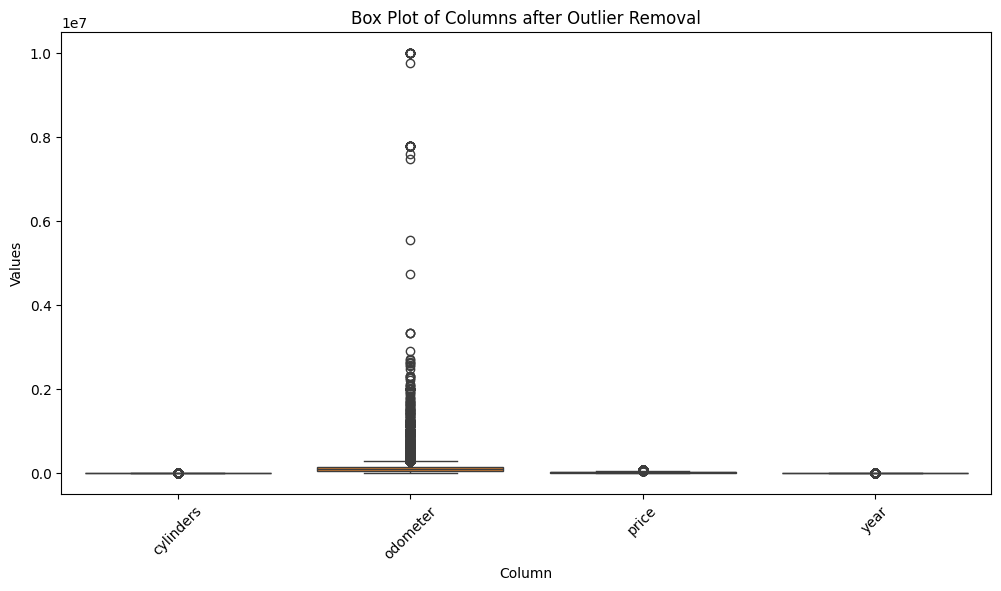

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt
#boxplot before cleaning
columns_for_boxplot = ['cylinders', 'odometer', 'price','year']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=ucpp[columns_for_boxplot])
plt.title('Box Plot of Columns after Outlier Removal')
plt.xlabel('Column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [244]:
columns_to_check = ['cylinders', 'odometer', 'price','year']

#function to remove outliers based on IQR
def remove_outliers(ucpp, column):
    Q1 = ucpp[column].quantile(0.25)
    Q3 = ucpp[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = ucpp.loc[(ucpp[column] > lower_bound) & (ucpp[column] < upper_bound)]
    return df_out

# Loop through columns and remove outliers
for column in columns_to_check:
    ucpp = remove_outliers(ucpp, column)

In [245]:
ucpp

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel
0,auburn,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas
1,auburn,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas
2,auburn,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas
3,auburn,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,pickup,red,al,30990,gas
4,auburn,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304576,wyoming,2019,nissan,maxima,good,6,32226.0,clean,other,fwd,sedan,black,wy,23590,gas
304577,wyoming,2020,volvo,sedan,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas
304578,wyoming,2020,cadillac,xt4,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel
304579,wyoming,2018,lexus,es,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas


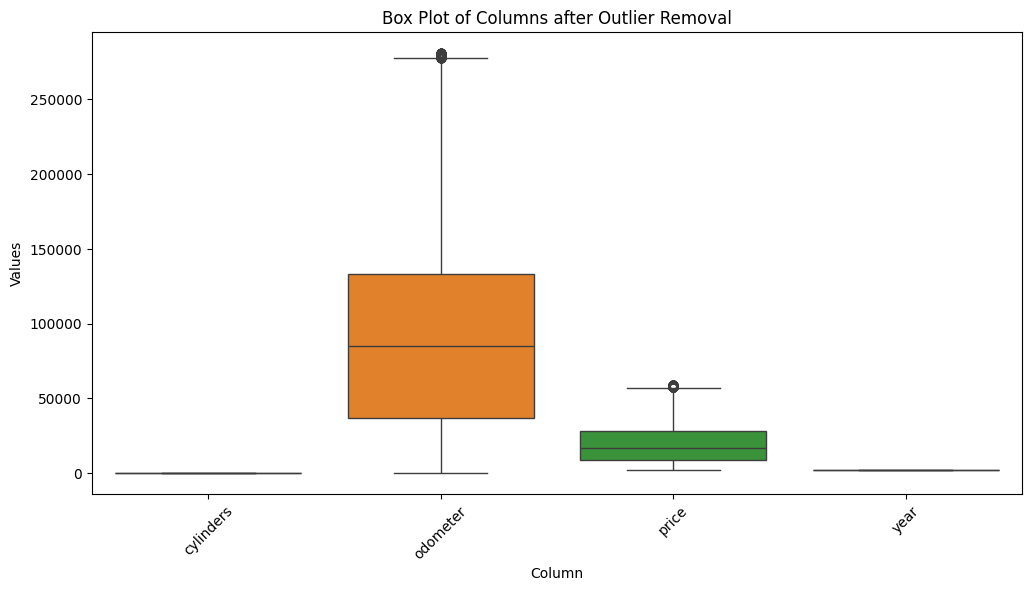

In [246]:
columns_for_boxplot = ['cylinders', 'odometer', 'price','year']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=ucpp[columns_for_boxplot])
plt.title('Box Plot of Columns after Outlier Removal')
plt.xlabel('Column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [247]:
ucpp['vehicle_age'] = 2022 - ucpp['year']
ucpp

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel,vehicle_age
0,auburn,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas,8
1,auburn,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas,12
2,auburn,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas,2
3,auburn,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,pickup,red,al,30990,gas,5
4,auburn,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304576,wyoming,2019,nissan,maxima,good,6,32226.0,clean,other,fwd,sedan,black,wy,23590,gas,3
304577,wyoming,2020,volvo,sedan,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas,2
304578,wyoming,2020,cadillac,xt4,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel,2
304579,wyoming,2018,lexus,es,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas,4


In [248]:
ucpp.reset_index(drop=True, inplace=True)

In [249]:
ucpp

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel,vehicle_age
0,auburn,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas,8
1,auburn,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas,12
2,auburn,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas,2
3,auburn,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,pickup,red,al,30990,gas,5
4,auburn,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292824,wyoming,2019,nissan,maxima,good,6,32226.0,clean,other,fwd,sedan,black,wy,23590,gas,3
292825,wyoming,2020,volvo,sedan,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas,2
292826,wyoming,2020,cadillac,xt4,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel,2
292827,wyoming,2018,lexus,es,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas,4


In [250]:
ucpp['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

In [251]:
print(len(ucpp))


292829


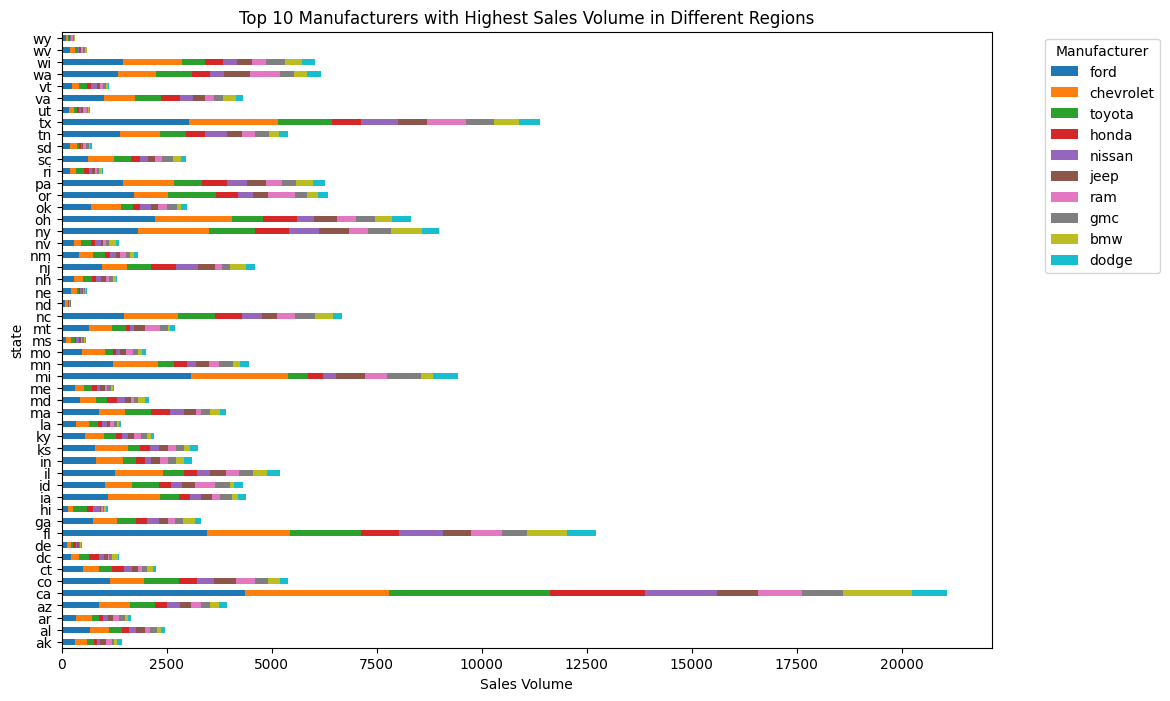

In [252]:
import pandas as pd
import matplotlib.pyplot as plt


top_manufacturers_by_region = ucpp.groupby(['state', 'manufacturer']).size().unstack()
top_manufacturers_by_region_total = top_manufacturers_by_region.sum(axis=0).sort_values(ascending=False)[:10]

top_manufacturers_by_region_filtered = top_manufacturers_by_region[top_manufacturers_by_region_total.index]
top_manufacturers_by_region_filtered.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.xlabel('Sales Volume')
plt.ylabel('state')
plt.title('Top 10 Manufacturers with Highest Sales Volume in Different Regions')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Insight:
The plot shows the top 10 manufacturers with the highest sales volume in various regions. It provides a clear picture of which manufacturers are leading in terms of sales across different states.

Impact:
This insight is crucial for understanding market trends and consumer preferences. It helps in identifying manufacturers that have strong market presence and are popular among customers in specific regions. This information can guide strategic decision-making in areas such as inventory management, marketing campaigns, and partnership opportunities.

Action:

Prioritize Partnerships: Collaborate with the top manufacturers to strengthen partnerships and capitalize on their popularity to drive sales.
Marketing Strategies: Tailor marketing strategies and promotions based on the popularity of manufacturers in different regions to attract more customers.
Inventory Management: Adjust inventory levels based on the demand for vehicles from top manufacturers to ensure optimal stock availability.
Customer Insights: Use this data to gain insights into customer preferences and preferences for specific manufacturers, allowing for targeted product offerings and improved customer satisfaction.


In [253]:
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'Condition': ucpp['condition'],
    'Price': ucpp['price']  # Example prices
}
df = pd.DataFrame(data)

# Group by Condition and calculate average price
avg_price_by_condition = df.groupby('Condition')['Price'].mean().reset_index()

# Calculate price variability (standard deviation) within each condition group
price_variability_by_condition = df.groupby('Condition')['Price'].std().reset_index()
price_variability_by_condition.rename(columns={'Price': 'Price Variability'}, inplace=True)

# Merge average price and price variability into a single DataFrame
price_sensitivity = pd.merge(avg_price_by_condition, price_variability_by_condition, on='Condition')

# Print the price sensitivity analysis
print(price_sensitivity)


   Condition         Price  Price Variability
0  excellent  16923.298959       11504.192564
1       fair   4689.377288        3632.622974
2       good  21621.834479       12703.969435
3   like new  20382.496093       13753.931088
4        new  27608.936389       15763.748943
5    salvage   6852.429119        5775.444060


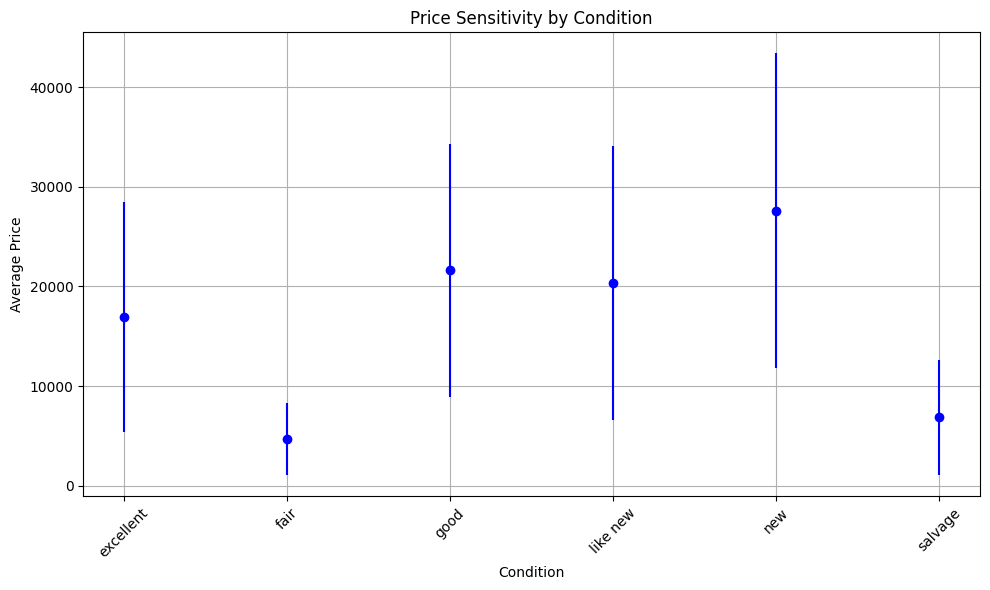

In [254]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    'Condition': ucpp['condition'],
    'Price': ucpp['price']  # Example prices
}
df = pd.DataFrame(data)

# Group by Condition and calculate average price
avg_price_by_condition = df.groupby('Condition')['Price'].mean().reset_index()

# Calculate price variability (standard deviation) within each condition group
price_variability_by_condition = df.groupby('Condition')['Price'].std().reset_index()
price_variability_by_condition.rename(columns={'Price': 'Price Variability'}, inplace=True)

# Merge average price and price variability into a single DataFrame
price_sensitivity = pd.merge(avg_price_by_condition, price_variability_by_condition, on='Condition')

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(price_sensitivity['Condition'], price_sensitivity['Price'],
             yerr=price_sensitivity['Price Variability'], fmt='o', color='blue')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.title('Price Sensitivity by Condition')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




Insight:
The plot illustrates the price sensitivity of used cars based on their condition, showcasing the average price for each condition category along with the variability in prices within each category.

Impact:
Understanding price sensitivity by condition is crucial for pricing strategies in the used car market.
It provides insights into how customers perceive and value cars in different conditions, influencing their purchasing decisions.
It helps identify which condition categories are more price-sensitive, allowing businesses to adjust pricing strategies accordingly.

Action Plan:

Pricing Adjustment:
Consider adjusting prices for condition categories with higher price variability to align with market demand and customer expectations.
Implement dynamic pricing strategies that factor in both average prices and price variability to maximize revenue and profitability.

Marketing and Sales:
Utilize price sensitivity insights from the analysis in marketing campaigns to highlight the value propositions of cars in various conditions.
Develop targeted promotions and discounts for condition categories that exhibit higher price sensitivity, attracting cost-conscious buyers and boosting sales.

Inventory Management and Customer Segmentation:
Optimize inventory levels by stocking more cars in condition categories with high demand and less price variability based on price sensitivity analysis.
Segment customers based on their sensitivity to price and condition, allowing for tailored offerings and pricing strategies to meet diverse preferences and enhance customer satisfaction and loyalty.

C:\Users\ishik\AppData\Local\Temp\ipykernel_29512\4294257554.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_type_mileage = df.groupby(['Vehicle Type', 'Mileage Category'])['Price'].mean().unstack()


<Figure size 2000x800 with 0 Axes>

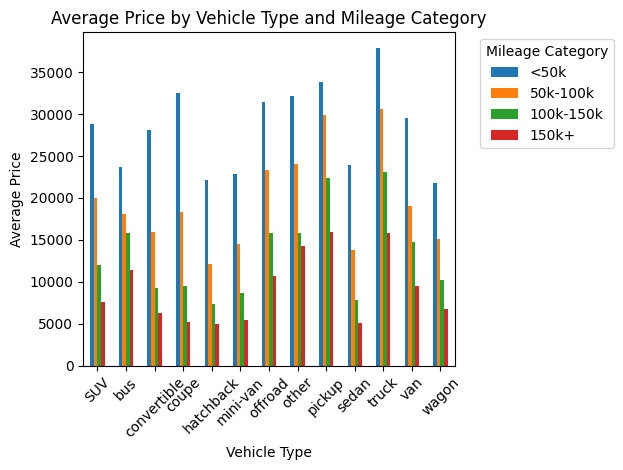

In [255]:
data = {
    'Price': ucpp['price'],
    'Mileage': ucpp['odometer'],
    'Vehicle Type': ucpp['type']  
}
df = pd.DataFrame(data)

# Define mileage categories based on ranges (customize as needed)
df['Mileage Category'] = pd.cut(df['Mileage'], bins=[0, 50000, 100000, 150000, float('inf')],
                                 labels=['<50k', '50k-100k', '100k-150k', '150k+'])

# Group by vehicle type and mileage category, calculate average price
avg_price_by_type_mileage = df.groupby(['Vehicle Type', 'Mileage Category'])['Price'].mean().unstack()

# Plotting
plt.figure(figsize=(20, 8))
avg_price_by_type_mileage.plot(kind='bar', stacked=False)
plt.title('Average Price by Vehicle Type and Mileage Category')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Mileage Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Action:

For Buyers:

Identify the most cost-effective vehicle types based on mileage categories. Consider purchasing vehicles with lower mileage in the desired vehicle type to get better value for money.
Compare average prices across different vehicle types and mileage ranges to determine the best deals and negotiate prices effectively.
For Sellers:

Use the insights from the chart to set competitive prices for vehicles based on their type and mileage. Price vehicles competitively within each mileage category to attract more buyers.
Highlight vehicles with lower mileage in marketing campaigns to appeal to buyers looking for well-maintained used cars.
Consider offering discounts or promotions for vehicles with higher mileage to make them more appealing to budget-conscious buyers.
For Market Analysis:

Monitor market trends by analyzing changes in average prices across vehicle types and mileage categories over time. Adjust pricing strategies accordingly to stay competitive and meet market demand.
Keep track of customer preferences and buying behavior related to mileage and vehicle types to adapt inventory management and marketing strategies effectively.
Conduct regular market research to stay updated on pricing dynamics and adjust pricing strategies proactively to optimize sales and profitability.
User

Insight:
As I analyze the plotted bar chart, I gain valuable insight into the average price of different vehicle types categorized by mileage ranges. This visualization enables me to understand how prices vary based on both the type of vehicle and its mileage, providing valuable insights into the pricing dynamics within the used car market.

Impact:
Understanding the relationship between vehicle type, mileage, and price is crucial for me as a buyer or seller in the used car industry. This information empowers me to make informed decisions when buying or selling a used car, ensuring that I can optimize my financial outcomes and meet my specific requirements.

In [310]:
ucpp.

region           0
year             0
manufacturer     0
model            0
condition        0
cylinders        0
odometer         0
title_status     0
transmission     0
drive            0
type             0
paint_color      0
state            0
price            0
fuel             0
vehicle_age      0
cluster_label    0
dtype: int64

In [256]:
ucpp['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

In [257]:
ucpp['region'].value_counts()

region
central NJ               2429
denver                   2397
grand rapids             2358
minneapolis / st paul    2333
boston                   2319
                         ... 
meridian                   14
southwest MS               12
fort smith, AR              7
kansas city                 7
west virginia (old)         6
Name: count, Length: 404, dtype: int64

In [258]:
ucpp['region'].value_counts()

region
central NJ               2429
denver                   2397
grand rapids             2358
minneapolis / st paul    2333
boston                   2319
                         ... 
meridian                   14
southwest MS               12
fort smith, AR              7
kansas city                 7
west virginia (old)         6
Name: count, Length: 404, dtype: int64

In [259]:
ucpp['region'].nunique()

404

In [260]:
ucpp2=ucpp.copy()

In [261]:
from kmodes.kmodes import KModes
X = ucpp[['region']]

# Initialize the K-modes clustering algorithm with the desired number of clusters
n_clusters = 5  # Adjust the number of clusters as needed
kmodes = KModes(n_clusters=n_clusters, init='Cao', random_state=42)

# Fit the K-modes model to the data
clusters = kmodes.fit_predict(X)

# Add cluster labels to the DataFrame
ucpp['cluster_label'] = clusters

# View the results
print(ucpp.head())

   region  year manufacturer       model  condition  cylinders  odometer  \
0  auburn  2014          gmc   gmc_other       good          8   57923.0   
1  auburn  2010    chevrolet   silverado       good          8   71229.0   
2  auburn  2020    chevrolet   silverado       good          8   19160.0   
3  auburn  2017       toyota      tundra       good          8   41124.0   
4  auburn  2013         ford  ford_other  excellent          6  128000.0   

  title_status transmission drive    type paint_color state  price fuel  \
0        clean        other   4wd  pickup       white    al  33590  gas   
1        clean        other   4wd  pickup        blue    al  22590  gas   
2        clean        other   4wd  pickup         red    al  39590  gas   
3        clean        other   4wd  pickup         red    al  30990  gas   
4        clean    automatic   rwd   truck       black    al  15000  gas   

   vehicle_age  cluster_label  
0            8              0  
1           12              

In [311]:
ucpp.drop(columns='cluster_label',inplace=True)

In [314]:
ucpp['model'].nunique()

534

In [336]:
ucpp.drop(columns=['vehicle_age'],inplace=True)

In [337]:
X=ucpp.drop(columns='price')
y=ucpp['price']

In [338]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [340]:
ohe=OneHotEncoder()
ohe.fit(X[['region','model','manufacturer','condition','title_status','transmission','drive','type','paint_color','state','fuel']])

OneHotEncoder()

In [341]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['region','model','manufacturer','condition','title_status','transmission','drive','type','paint_color','state','fuel']),remainder='passthrough')

In [342]:
lr = LinearRegression()
pipe_lr = make_pipeline(column_trans, lr)
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

In [343]:
r2_linear=r2_score(y_test,y_pred_lr)
r2_linear

0.7717008685725985

In [344]:
import pickle

In [345]:
# Decision Tree model
dt = DecisionTreeRegressor()
pipe_dt = make_pipeline(column_trans, dt)
pipe_dt.fit(X_train, y_train)
y_pred_dt = pipe_dt.predict(X_test)

In [346]:
r2_decision=r2_score(y_test,y_pred_dt)
r2_decision

0.907926204726845

In [347]:
# Random Forest model with adjusted parameters
rf = RandomForestRegressor(n_estimators=200, max_depth=20, max_features='sqrt', random_state=0)
pipe_rf = make_pipeline(column_trans, rf)
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)
r2_randomforest=r2_score(y_test,y_pred_rf)
r2_randomforest

0.7599139103839263

In [348]:
# Stack predictions as meta-features
meta_features = np.column_stack((y_pred_lr, y_pred_dt, y_pred_rf))

In [349]:
# Initialize meta-model (Ridge Regression as an example)
meta_model = Ridge()
meta_model.fit(meta_features, y_test)
y_pred_stacked = meta_model.predict(meta_features)

In [350]:
# Calculate R-squared score for the stacked model
r2_stacked = r2_score(y_test, y_pred_stacked)
print("Stacked Model R-squared:", r2_stacked)

Stacked Model R-squared: 0.9206535670750092


In [351]:
pipe2=make_pipeline(column_trans,dt)
pipe2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['SF bay area', 'abilene', 'akron / canton', 'albany',
       'albuquerque', 'altoona-johnstown', 'amarillo', 'ames',
       'anchorage / mat-su', 'ann arbor', 'annapolis',
       'appleton-oshkosh-FDL', 'asheville', 'ashtabula', 'athens',
       'atlanta', '...
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
       'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy'], dtype=object),
                                                                            array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)]),
                                                  ['region', 'model',
                                                   'manufacturer', 'condition',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state', 'fuel'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [387]:
predicted_price=pipe2.predict(pd.DataFrame([['santa barbara',2019,'jeep','cherokee','good',4,97994,'clean','automatic','fwd','SUV','black','ca','gas']],columns=['region','year','manufacturer','model','condition','cylinders','odometer','title_status','transmission','drive','type','paint_color','state','fuel']))
predicted_price

array([17927.])

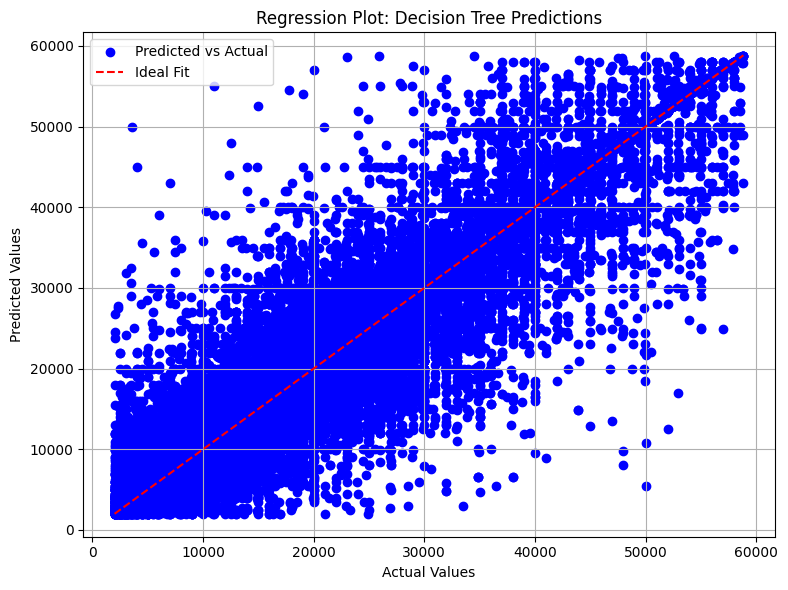

In [354]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', label='Predicted vs Actual') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Fit') 
plt.title('Regression Plot: Decision Tree Predictions') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values') 
plt.legend() 
plt.grid(True)
plt.tight_layout() 
plt.show()


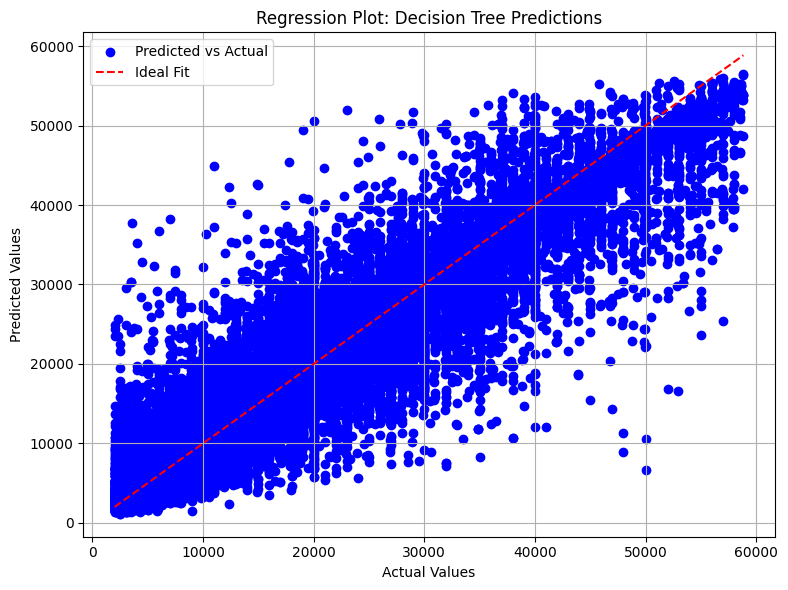

In [355]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_stacked, color='blue', label='Predicted vs Actual') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Fit') 
plt.title('Regression Plot: Decision Tree Predictions') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values') 
plt.legend() 
plt.grid(True)
plt.tight_layout() 
plt.show()


In [388]:
# Save the trained model to a file
with open('used_car_price_model.pkl', 'wb') as file:
    pickle.dump(pipe_dt, file)


In [263]:
# ucpp['cluster_label'].unique()

array([0, 1, 4, 2, 3], dtype=uint16)

In [264]:
# encoder = OneHotEncoder()
# clusters_onehot = encoder.fit_transform(ucpp[['cluster_label']]).toarray()

# # Convert the one-hot encoded clusters to a DataFrame
# clusters_df = pd.DataFrame(clusters_onehot, columns=[f'Cluster_{i+1}' for i in range(clusters_onehot.shape[1])])

# # Concatenate the original DataFrame with the one-hot encoded clusters
# ucpp_encoded_region = pd.concat([ucpp, clusters_df], axis=1)



In [265]:
# ucpp_encoded_region.head()

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,...,state,price,fuel,vehicle_age,cluster_label,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
0,auburn,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,...,al,33590,gas,8,0,1.0,0.0,0.0,0.0,0.0
1,auburn,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,...,al,22590,gas,12,0,1.0,0.0,0.0,0.0,0.0
2,auburn,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,...,al,39590,gas,2,0,1.0,0.0,0.0,0.0,0.0
3,auburn,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,...,al,30990,gas,5,0,1.0,0.0,0.0,0.0,0.0
4,auburn,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,...,al,15000,gas,9,0,1.0,0.0,0.0,0.0,0.0


In [266]:
# ucpp_encoded_region['Cluster_1'].unique()

array([1., 0.])

In [267]:
# cluster_names = {
#     0: 'region_1',
#     1: 'region_2',
#     2: 'region_3',
#     3: 'region_4',
#     4: 'region_5'
# }

# # Rename the one-hot encoded columns using the cluster names
# ucpp_encoded_region.rename(columns={f'Cluster_{i+1}': cluster_names[i] for i in range(len(cluster_names))}, inplace=True)

# ucpp_encoded_region.head()

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,...,state,price,fuel,vehicle_age,cluster_label,region_1,region_2,region_3,region_4,region_5
0,auburn,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,...,al,33590,gas,8,0,1.0,0.0,0.0,0.0,0.0
1,auburn,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,...,al,22590,gas,12,0,1.0,0.0,0.0,0.0,0.0
2,auburn,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,...,al,39590,gas,2,0,1.0,0.0,0.0,0.0,0.0
3,auburn,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,...,al,30990,gas,5,0,1.0,0.0,0.0,0.0,0.0
4,auburn,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,...,al,15000,gas,9,0,1.0,0.0,0.0,0.0,0.0


In [268]:
# columns_to_drop=['region','cluster_label']
# ucpp_encoded_region.drop(columns=columns_to_drop, inplace=True)

In [269]:
# ucpp_encoded_region.head()

,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel,vehicle_age,region_1,region_2,region_3,region_4,region_5
0,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas,8,1.0,0.0,0.0,0.0,0.0
1,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas,12,1.0,0.0,0.0,0.0,0.0
2,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas,2,1.0,0.0,0.0,0.0,0.0
3,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,pickup,red,al,30990,gas,5,1.0,0.0,0.0,0.0,0.0
4,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas,9,1.0,0.0,0.0,0.0,0.0


In [270]:
# ucpp_encoded_region['manufacturer'].value_counts()

manufacturer
ford              47791
chevrolet         36936
toyota            25298
honda             15954
nissan            13941
jeep              13220
ram               12438
gmc               11826
bmw               11384
dodge              9072
mercedesbenz       7935
subaru             7486
hyundai            7462
volkswagen         7064
lexus              6546
audi               6125
kia                6082
acura              5076
cadillac           5062
chrysler           4398
mazda              4120
buick              4085
infiniti           4004
lincoln            3357
volvo              2547
mitsubishi         2510
mini               1940
jaguar             1640
rover              1510
pontiac            1391
porsche             890
saturn              808
alfaromeo           796
tesla               702
mercury             673
fiat                636
harleydavidson      110
land rover            9
ferrari               3
astonmartin           2
Name: count, dtype: int64

In [271]:
# Y = ucpp_encoded_region[['manufacturer']]

# # Initialize the K-modes clustering algorithm with the desired number of clusters
#   # Adjust the number of clusters as needed
# kmodes = KModes(n_clusters=5, init='Cao', random_state=42)

# # Fit the K-modes model to the data
# clusters = kmodes.fit_predict(Y)

# # Add cluster labels to the DataFrame
# ucpp_encoded_region['cluster_label'] = clusters

# clusters_onehot = encoder.fit_transform(ucpp_encoded_region[['cluster_label']]).toarray()

# # Convert the one-hot encoded clusters to a DataFrame
# clusters_df = pd.DataFrame(clusters_onehot, columns=[f'Cluster_{i+1}' for i in range(clusters_onehot.shape[1])])

# # Concatenate the original DataFrame with the one-hot encoded clusters
# ucpp_encoded_manufacturer = pd.concat([ucpp_encoded_region, clusters_df], axis=1)


In [272]:
# ucpp_encoded_manufacturer.head()

,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,...,region_2,region_3,region_4,region_5,cluster_label,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
0,2014,gmc,gmc_other,good,8,57923.0,clean,other,4wd,pickup,...,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0
1,2010,chevrolet,silverado,good,8,71229.0,clean,other,4wd,pickup,...,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0
2,2020,chevrolet,silverado,good,8,19160.0,clean,other,4wd,pickup,...,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0
3,2017,toyota,tundra,good,8,41124.0,clean,other,4wd,pickup,...,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0
4,2013,ford,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,...,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0


In [273]:
# cluster_names = {
#     0: 'manufacturer_1',
#     1: 'manufacturer_2',
#     2: 'manufacturer_3',
#     3: 'manufacturer_4',
#     4: 'manufacturer_5'
# }

# # Rename the one-hot encoded columns using the cluster names
# ucpp_encoded_manufacturer.rename(columns={f'Cluster_{i+1}': cluster_names[i] for i in range(len(cluster_names))}, inplace=True)

# columns_to_drop=['manufacturer','cluster_label']
# ucpp_encoded_manufacturer.drop(columns=columns_to_drop, inplace=True)

# ucpp_encoded_manufacturer.head()

,year,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,...,region_1,region_2,region_3,region_4,region_5,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5
0,2014,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2010,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2020,silverado,good,8,19160.0,clean,other,4wd,pickup,red,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2017,tundra,good,8,41124.0,clean,other,4wd,pickup,red,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2013,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [274]:
# ucpp_encoded_manufacturer['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [275]:
# ucpp_encoded_condition=ucpp_encoded_manufacturer.copy()

In [276]:
# ucpp_encoded_manufacturer['condition'].value_counts()

condition
good         133639
excellent    132881
like new      21756
fair           3223
new            1069
salvage         261
Name: count, dtype: int64

In [277]:
# # Define the unique values and their corresponding labels
# value_labels = {
#     'salvage': 0,
#     'fair': 1,
#     'good': 2,
#     'excellent': 3,
#     'like new': 4,
#     'new': 5
# }

# # Create a LabelEncoder object
# label_encoder = LabelEncoder()

# # Map the labels to the column based on the specified encoding
# ucpp_encoded_condition['encoded_condition'] = ucpp_encoded_condition['condition'].map(value_labels)



In [278]:
# ucpp_encoded_condition.head()

,year,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,...,region_2,region_3,region_4,region_5,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,encoded_condition
0,2014,gmc_other,good,8,57923.0,clean,other,4wd,pickup,white,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,2010,silverado,good,8,71229.0,clean,other,4wd,pickup,blue,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,2020,silverado,good,8,19160.0,clean,other,4wd,pickup,red,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,2017,tundra,good,8,41124.0,clean,other,4wd,pickup,red,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,2013,ford_other,excellent,6,128000.0,clean,automatic,rwd,truck,black,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


In [279]:
# col_to_drop=['condition']
# ucpp_encoded_condition.drop(columns=col_to_drop, inplace=True)

In [280]:
# ucpp_encoded_condition.head()

,year,model,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,...,region_2,region_3,region_4,region_5,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,encoded_condition
0,2014,gmc_other,8,57923.0,clean,other,4wd,pickup,white,al,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,2010,silverado,8,71229.0,clean,other,4wd,pickup,blue,al,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,2020,silverado,8,19160.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,2017,tundra,8,41124.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,2013,ford_other,6,128000.0,clean,automatic,rwd,truck,black,al,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


In [281]:
# # Rename the 'encoded_condition' column to 'condition'
# ucpp_encoded_condition = ucpp_encoded_condition.rename(columns={'encoded_condition': 'condition'})

In [282]:
# ucpp_encoded_condition.head()

,year,model,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,...,region_2,region_3,region_4,region_5,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,condition
0,2014,gmc_other,8,57923.0,clean,other,4wd,pickup,white,al,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,2010,silverado,8,71229.0,clean,other,4wd,pickup,blue,al,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,2020,silverado,8,19160.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,2017,tundra,8,41124.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,2013,ford_other,6,128000.0,clean,automatic,rwd,truck,black,al,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


In [283]:
# ucpp_encoded_condition['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [284]:
# encoded_title_status = encoder.fit_transform(ucpp_encoded_condition['title_status'].values.reshape(-1, 1))

# # Convert the encoded array into a DataFrame
# encoded_title_status_df = pd.DataFrame(encoded_title_status.toarray(), columns=encoder.categories_[0])

# # Concatenate the encoded columns with the main dataset
# ucpp_encoded_title = pd.concat([ucpp_encoded_condition, encoded_title_status_df], axis=1)

In [285]:
# ucpp_encoded_title

,year,model,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,...,manufacturer_3,manufacturer_4,manufacturer_5,condition,clean,lien,missing,parts only,rebuilt,salvage
0,2014,gmc_other,8,57923.0,clean,other,4wd,pickup,white,al,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
1,2010,silverado,8,71229.0,clean,other,4wd,pickup,blue,al,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
2,2020,silverado,8,19160.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
3,2017,tundra,8,41124.0,clean,other,4wd,pickup,red,al,...,1.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
4,2013,ford_other,6,128000.0,clean,automatic,rwd,truck,black,al,...,0.0,0.0,0.0,3,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292824,2019,maxima,6,32226.0,clean,other,fwd,sedan,black,wy,...,0.0,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0
292825,2020,sedan,6,12029.0,clean,other,fwd,sedan,red,wy,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
292826,2020,xt4,6,4174.0,clean,other,fwd,hatchback,white,wy,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
292827,2018,es,6,30112.0,clean,other,fwd,sedan,silver,wy,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0


In [286]:
# ucpp_encoded_title['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [287]:
# encoded_transmission = encoder.fit_transform(ucpp_encoded_title['transmission'].values.reshape(-1, 1))

# # Convert the encoded array into a DataFrame
# encoded_transmission_df = pd.DataFrame(encoded_transmission.toarray(), columns=encoder.categories_[0])

# # Concatenate the encoded columns with the main dataset
# ucpp_encoded_transmission = pd.concat([ucpp_encoded_title, encoded_transmission_df], axis=1)

In [288]:
# ucpp_encoded_transmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292829 entries, 0 to 292828
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            292829 non-null  int32  
 1   model           292829 non-null  object 
 2   cylinders       292829 non-null  int32  
 3   odometer        292829 non-null  float64
 4   title_status    292829 non-null  object 
 5   transmission    292829 non-null  object 
 6   drive           292829 non-null  object 
 7   type            292829 non-null  object 
 8   paint_color     292829 non-null  object 
 9   state           292829 non-null  object 
 10  price           292829 non-null  int64  
 11  fuel            292829 non-null  object 
 12  vehicle_age     292829 non-null  int32  
 13  region_1        292829 non-null  float64
 14  region_2        292829 non-null  float64
 15  region_3        292829 non-null  float64
 16  region_4        292829 non-null  float64
 17  region_5  

In [289]:
# ucpp_encoded_transmission['drive'].value_counts()

drive
4wd    134482
fwd    106320
rwd     52027
Name: count, dtype: int64

In [290]:
# ucpp_encoded_transmission['type'].value_counts()

type
sedan          81515
SUV            70508
pickup         42076
truck          26572
other          16722
hatchback      14424
coupe          13889
wagon           8502
van             7877
mini-van        5391
convertible     4891
offroad          308
bus              154
Name: count, dtype: int64

In [291]:
# ucpp_encoded_transmission['paint_color'].value_counts()

paint_color
white     89968
black     73567
silver    42716
blue      27572
red       23994
grey      18399
brown      4861
custom     4550
green      4387
orange     1262
yellow     1149
purple      404
Name: count, dtype: int64

In [292]:
# ucpp_encoded_transmission['state'].value_counts()

state
ca    32676
fl    19402
tx    16111
ny    13986
mi    13390
oh    12410
pa     9972
nc     9817
or     8988
wi     8690
wa     8390
co     8117
tn     7901
il     7639
nj     7530
va     6542
mn     6115
ma     6105
az     6031
ia     5914
id     5827
ga     5235
in     4623
ks     4585
sc     4525
ok     4292
ct     3696
al     3639
md     3435
mt     3429
ky     3165
nm     2840
mo     2835
nv     2261
dc     2259
ar     2244
la     2029
ak     1945
nh     1935
me     1750
hi     1748
ri     1625
vt     1620
sd      872
ut      867
wv      842
ne      794
ms      755
de      710
wy      440
nd      281
Name: count, dtype: int64

In [293]:
# ucpp_encoded_transmission['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [294]:
# ucpp_encoded_con4=ucpp_encoded_transmission.copy()

In [295]:
# # Define the columns for one-hot encoding
# columns_to_encode = ['drive', 'type', 'paint_color', 'state', 'fuel']

# # Create an empty DataFrame to store the encoded data
# encoded_data = pd.DataFrame()

# # Iterate through each column and apply one-hot encoding
# for column in columns_to_encode:
    
    
#     # Fit and transform the current column using OneHotEncoder
#     encoded_column = encoder.fit_transform(ucpp_encoded_con4[[column]]).toarray()
    
#     # Get the feature names from the encoder
#     feature_names = [f"{column}_{category}" for category in encoder.categories_[0]]
    
#     # Convert the encoded column into a DataFrame with the appropriate column names
#     encoded_column_df = pd.DataFrame(encoded_column, columns=feature_names)
    
#     # Concatenate the encoded column with the existing encoded_data DataFrame
#     encoded_data = pd.concat([encoded_data, encoded_column_df], axis=1)


In [296]:
# encoded_data.head()

,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,...,state_vt,state_wa,state_wi,state_wv,state_wy,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [297]:
# final_encoded=pd.concat([ucpp_encoded_con4,encoded_data],axis=1)

In [298]:
# final_encoded

,year,model,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,...,state_vt,state_wa,state_wi,state_wv,state_wy,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,2014,gmc_other,8,57923.0,clean,other,4wd,pickup,white,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2010,silverado,8,71229.0,clean,other,4wd,pickup,blue,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020,silverado,8,19160.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2017,tundra,8,41124.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2013,ford_other,6,128000.0,clean,automatic,rwd,truck,black,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292824,2019,maxima,6,32226.0,clean,other,fwd,sedan,black,wy,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
292825,2020,sedan,6,12029.0,clean,other,fwd,sedan,red,wy,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
292826,2020,xt4,6,4174.0,clean,other,fwd,hatchback,white,wy,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
292827,2018,es,6,30112.0,clean,other,fwd,sedan,silver,wy,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [299]:
# final_encoded.drop(columns=columns_to_encode,inplace=True)

In [300]:
# final_encoded.drop(columns=['title_status','transmission'],inplace=True)

In [301]:
# final_ucpp=final_encoded.copy()

In [302]:
# final_ucpp.drop(columns='model',inplace=True)

In [303]:
# final_ucpp.head()

,year,model,cylinders,odometer,price,vehicle_age,region_1,region_2,region_3,region_4,...,state_vt,state_wa,state_wi,state_wv,state_wy,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,2014,gmc_other,8,57923.0,33590,8,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2010,silverado,8,71229.0,22590,12,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020,silverado,8,19160.0,39590,2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2017,tundra,8,41124.0,30990,5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2013,ford_other,6,128000.0,15000,9,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [304]:
# # Compute the correlation matrix
# corr_matrix = final_ucpp.corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(10, 8))

# # Create the heatmap
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# # Add a title
# plt.title('Correlation Heatmap')

# # Show the plot
# plt.show()


ValueError: could not convert string to float: 'gmc_other'

In [ ]:
# corr_matrix = final_ucpp.corr()
# corr_matrix

,year,cylinders,odometer,price,vehicle_age,region_1,region_2,region_3,region_4,region_5,...,state_vt,state_wa,state_wi,state_wv,state_wy,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
year,1.000000,0.128107,-0.678048,0.646827,-1.000000,0.013141,-0.019082,0.004337,-0.011351,0.000267,...,0.000935,0.014826,-0.016409,0.015386,0.005384,-0.078615,0.044011,-0.112490,0.021681,0.191835
cylinders,0.128107,1.000000,-0.142966,0.538153,-0.128107,0.012476,-0.005476,-0.007024,-0.003564,-0.008597,...,-0.013788,0.024715,0.001704,0.022416,0.013164,0.175826,0.017811,-0.177462,-0.069387,0.116222
odometer,-0.678048,-0.142966,1.000000,-0.589571,0.678048,-0.027919,0.017843,0.017754,0.017174,0.002275,...,0.007645,-0.015564,0.008177,-0.014743,-0.002751,0.140011,-0.058386,0.079427,-0.005515,-0.201841
price,0.646827,0.538153,-0.589571,1.000000,-0.646827,0.024360,-0.011539,-0.006151,-0.022011,-0.008453,...,-0.010809,0.063559,-0.024058,0.027628,0.011396,0.214912,0.035613,-0.280070,-0.033617,0.199436
vehicle_age,-1.000000,-0.128107,0.678048,-0.646827,1.000000,-0.013141,0.019082,-0.004337,0.011351,-0.000267,...,-0.000935,-0.014826,0.016409,-0.015386,-0.005384,0.078615,-0.044011,0.112490,-0.021681,-0.191835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel_diesel,-0.078615,0.175826,0.140011,0.214912,0.078615,0.012880,-0.004229,-0.002023,-0.009244,-0.010012,...,0.004489,0.016145,-0.006469,0.005789,0.011546,1.000000,-0.015931,-0.553987,-0.028290,-0.069464
fuel_electric,0.044011,0.017811,-0.058386,0.035613,-0.044011,0.003512,-0.001135,-0.002737,-0.003254,0.000189,...,-0.000307,-0.000785,-0.000884,-0.001765,-0.001334,-0.015931,1.000000,-0.160698,-0.008206,-0.020150
fuel_gas,-0.112490,-0.177462,0.079427,-0.280070,0.112490,-0.018668,0.003680,0.013728,0.014679,0.004831,...,0.009097,0.021479,0.017108,-0.014432,-0.008652,-0.553987,-0.160698,1.000000,-0.285366,-0.700693
fuel_hybrid,0.021681,-0.069387,-0.005515,-0.033617,-0.021681,-0.001283,0.004323,-0.002527,-0.000165,0.000871,...,0.004539,-0.006109,-0.007411,-0.004874,-0.000978,-0.028290,-0.008206,-0.285366,1.000000,-0.035782


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming final_ucpp is your DataFrame with features and target variable
# # X contains features, y contains the target variable
# X = final_ucpp.drop('price', axis=1)  # Adjust the target column name
# y = final_ucpp['price']  # Adjust the target column name

# # Split the data into training and testing sets (e.g., 80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize different regression models
# linear_reg = LinearRegression()
# decision_tree_reg = DecisionTreeRegressor(random_state=42)
# random_forest_reg = RandomForestRegressor(random_state=42)

# # Train the models
# linear_reg.fit(X_train, y_train)
# decision_tree_reg.fit(X_train, y_train)
# random_forest_reg.fit(X_train, y_train)

# # Predictions
# y_pred_linear = linear_reg.predict(X_test)
# y_pred_dt = decision_tree_reg.predict(X_test)
# y_pred_rf = random_forest_reg.predict(X_test)

# # Evaluate the models
# linear_reg_mse = mean_squared_error(y_test, y_pred_linear)
# linear_reg_r2 = r2_score(y_test, y_pred_linear)

# dt_reg_mse = mean_squared_error(y_test, y_pred_dt)
# dt_reg_r2 = r2_score(y_test, y_pred_dt)

# rf_reg_mse = mean_squared_error(y_test, y_pred_rf)
# rf_reg_r2 = r2_score(y_test, y_pred_rf)

# # Print the evaluation metrics
# print("Linear Regression:")
# print(f"MSE: {linear_reg_mse}")
# print(f"R-squared: {linear_reg_r2}")
# print()

# print("Decision Tree Regression:")
# print(f"MSE: {dt_reg_mse}")
# print(f"R-squared: {dt_reg_r2}")
# print()

# print("Random Forest Regression:")
# print(f"MSE: {rf_reg_mse}")
# print(f"R-squared: {rf_reg_r2}")


Linear Regression:
MSE: 35662312.94617154
R-squared: 0.770899819317672

Decision Tree Regression:
MSE: 20090057.943241153
R-squared: 0.8709383793568809

Random Forest Regression:
MSE: 11677127.730444431
R-squared: 0.9249843363515592


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import StackingRegressor
# import numpy as np

# # Assume X_train, X_test, y_train, y_test are your training and testing data

# # Initialize base models
# linear_reg = LinearRegression()
# decision_tree = DecisionTreeRegressor()
# random_forest = RandomForestRegressor()

# # Train base models
# linear_reg.fit(X_train, y_train)
# decision_tree.fit(X_train, y_train)
# random_forest.fit(X_train, y_train)

# # Make predictions using base models
# linear_reg_pred = linear_reg.predict(X_test)
# decision_tree_pred = decision_tree.predict(X_test)
# random_forest_pred = random_forest.predict(X_test)

# # Stack predictions as meta-features
# meta_features = np.column_stack((linear_reg_pred, decision_tree_pred, random_forest_pred))

# # Initialize meta-model (stacking regressor)
# meta_model = RandomForestRegressor()

# # Train meta-model using meta-features and actual target values
# meta_model.fit(meta_features, y_test)

# # Make predictions using the stacked model
# stacked_pred = meta_model.predict(meta_features)

# # Evaluate the performance of the stacked model
# mse_stacked = mean_squared_error(y_test, stacked_pred)
# r2_stacked = r2_score(y_test, stacked_pred)

# print("Stacked Model MSE:", mse_stacked)
# print("Stacked Model R-squared:", r2_stacked)


Stacked Model MSE: 1740512.3294866304
Stacked Model R-squared: 0.9888186812289186


In [ ]:
# mssr=mse_stacked.sqrt

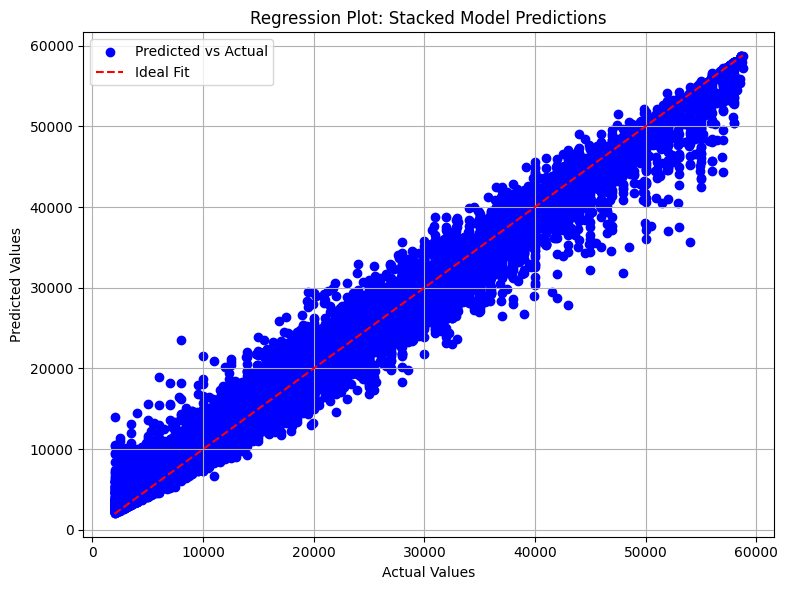

In [ ]:

# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, stacked_pred, color='blue', label='Predicted vs Actual') 
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Fit') 
# plt.title('Regression Plot: Stacked Model Predictions') 
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values') 
# plt.legend() 
# plt.grid(True)
# plt.tight_layout() 
# plt.show()


In [ ]:
# pipe2=make_pipeline(column_trans,dt)
# pipe2.fit(X_train,y_train)